In [83]:
import config

In [89]:
config.host

AttributeError: module 'config' has no attribute 'host'

In [1]:
from bs4 import BeautifulSoup
import requests
import mysql.connector 
from mysql.connector import errorcode
import config
import json
import datetime
import time
import numpy as np
import pandas as pd

In [2]:
request = requests.get("http://www.billboard.com/charts/hot-100/1990-01-06")

In [8]:
def clean(lst):
    clean_lst = []
    for i in lst:
        j = i.text.strip()
        clean_lst.append(j)
    return clean_lst

In [9]:
def get_data(date_):
    url = "http://www.billboard.com/charts/hot-100/"+date_
    request = requests.get(url)
    if request.status_code != 200:
        return False
    soup = BeautifulSoup(request.content, 'html.parser')
    song_titles = clean(soup.find_all(class_ = 'chart-element__information__song text--truncate color--primary'))
    song_rankings = clean(soup.find_all(class_ = 'chart-element__rank__number'))
    song_artists = clean(soup.find_all(class_ = 'chart-element__information__artist text--truncate color--secondary'))
    peak_ranking = clean(soup.find_all(class_ = 'chart-element__meta text--center color--secondary text--peak'))
    weeks_top_100 = clean(soup.find_all(class_ = 'chart-element__meta text--center color--secondary text--week'))
    billboard_week = clean(soup.find_all(class_ = "date-selector__button button--link"))
    
    weekly_ranking = []
    for i in range(len(song_rankings)):
        song_list = [song_rankings[i], song_titles[i], song_artists[i], peak_ranking[i], weeks_top_100[i]]
        weekly_ranking.append(song_list)
    weekly_dict = {billboard_week[0]: weekly_ranking}
    return weekly_dict

In [10]:
def iterate_dates(start_y, start_m, start_d, end_y, end_m, end_d):
    start_date = datetime.date(start_y, start_m, start_d)
    end_date = datetime.date(end_y, end_m, end_d)
    saturdays = []
    while start_date < end_date:
        if start_date.weekday() != 5:
            start_date += datetime.timedelta(days=1)
        else: 
            saturdays.append(start_date.isoformat())
        start_date += datetime.timedelta(days=1)
    return saturdays

In [42]:
missing_dates = []

In [12]:
def get_billboard_data(start_y, start_m, start_d, end_y, end_m, end_d):
    import time
    saturdays = iterate_dates(start_y, start_m, start_d, end_y, end_m, end_d)
    billboard_dict = {}
    print(billboard_dict)
    for i in saturdays:
        print(i)
        rndm_sleep = np.random.random(size=1)*20
        time.sleep(rndm_sleep)
        temp = get_data(i)
        if temp == False:
            missing_dates.append(i)
            continue
        print(temp)
        billboard_dict.update(temp)
    return billboard_dict

In [81]:
billboard_from_2003 = get_billboard_data(2003 , 1, 1, 2003, 12, 31)

{}
2003-01-11
{'January 11, 2003': [['1', 'Lose Yourself', 'Eminem', '1', '15'], ['2', 'Work It', 'Missy "Misdemeanor" Elliott', '2', '18'], ['3', 'Air Force Ones', 'Nelly Featuring Kyjuan, Ali & Murphy Lee', '3', '10'], ['4', "'03 Bonnie & Clyde", 'Jay-Z Featuring Beyonce Knowles', '4', '12'], ['5', 'Bump, Bump, Bump', 'B2K & P. Diddy', '5', '7'], ['6', 'Jenny From The Block', 'Jennifer Lopez Featuring Styles & Jadakiss', '3', '14'], ['7', 'Beautiful', 'Christina Aguilera', '6', '8'], ['8', "Don't Mess With My Man", 'Nivea Featuring Brian & Brandon Casey', '8', '23'], ['9', 'The Game Of Love', 'Santana Featuring Michelle Branch', '5', '15'], ['10', 'Landslide', 'Dixie Chicks', '10', '17'], ['11', 'Miss You', 'Aaliyah', '11', '7'], ['12', "I'm With You", 'Avril Lavigne', '12', '6'], ['13', 'She Hates Me', 'Puddle Of Mudd', '13', '14'], ['14', 'Underneath It All', 'No Doubt Featuring Lady Saw', '3', '20'], ['15', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '15', '3'], ['16', 'Lo

{'January 25, 2003': [['1', 'Lose Yourself', 'Eminem', '1', '17'], ['2', 'Bump, Bump, Bump', 'B2K & P. Diddy', '2', '9'], ['3', 'Air Force Ones', 'Nelly Featuring Kyjuan, Ali & Murphy Lee', '3', '12'], ['4', 'Beautiful', 'Christina Aguilera', '4', '10'], ['5', "'03 Bonnie & Clyde", 'Jay-Z Featuring Beyonce Knowles', '4', '14'], ['6', 'Work It', 'Missy "Misdemeanor" Elliott', '2', '20'], ['7', "I'm With You", 'Avril Lavigne', '7', '8'], ['8', 'Cry Me A River', 'Justin Timberlake', '8', '6'], ['9', "Don't Mess With My Man", 'Nivea Featuring Brian & Brandon Casey', '8', '25'], ['10', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '10', '5'], ['11', 'Miss You', 'Aaliyah', '11', '9'], ['12', 'Mesmerize', 'Ja Rule Featuring Ashanti', '12', '5'], ['13', 'Landslide', 'Dixie Chicks', '9', '19'], ['14', 'Jenny From The Block', 'Jennifer Lopez Featuring Styles & Jadakiss', '3', '16'], ['15', 'The Game Of Love', 'Santana Featuring Michelle Branch', '5', '17'], ['16', 'She Hates Me', 'Puddle O

{'February 8, 2003': [['1', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '1', '7'], ['2', 'Bump, Bump, Bump', 'B2K & P. Diddy', '1', '11'], ['3', 'Beautiful', 'Christina Aguilera', '2', '12'], ['4', "I'm With You", 'Avril Lavigne', '4', '10'], ['5', 'Mesmerize', 'Ja Rule Featuring Ashanti', '5', '7'], ['6', 'Cry Me A River', 'Justin Timberlake', '3', '8'], ['7', 'Miss You', 'Aaliyah', '7', '11'], ['8', "'03 Bonnie & Clyde", 'Jay-Z Featuring Beyonce Knowles', '4', '16'], ['9', 'Landslide', 'Dixie Chicks', '9', '21'], ['10', 'Air Force Ones', 'Nelly Featuring Kyjuan, Ali & Murphy Lee', '3', '14'], ['11', 'In Da Club', '50 Cent', '11', '5'], ['12', "Don't Mess With My Man", 'Nivea Featuring Brian & Brandon Casey', '8', '27'], ['13', 'Ignition', 'R. Kelly', '13', '14'], ['14', 'Gossip Folks', 'Missy "Misdemeanor" Elliott Featuring Ludacris', '14', '7'], ['15', 'Lose Yourself', 'Eminem', '1', '19'], ['16', 'Picture', 'Kid Rock Featuring Sheryl Crow', '16', '11'], ['17', 'The Game Of 

{'February 22, 2003': [['1', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '1', '9'], ['2', 'In Da Club', '50 Cent', '2', '7'], ['3', 'Mesmerize', 'Ja Rule Featuring Ashanti', '2', '9'], ['4', 'Bump, Bump, Bump', 'B2K & P. Diddy', '1', '13'], ['5', 'Cry Me A River', 'Justin Timberlake', '3', '10'], ['6', "I'm With You", 'Avril Lavigne', '4', '12'], ['7', 'Beautiful', 'Christina Aguilera', '2', '14'], ['8', 'Miss You', 'Aaliyah', '7', '13'], ['9', 'Gossip Folks', 'Missy "Misdemeanor" Elliott Featuring Ludacris', '9', '9'], ['10', 'Landslide', 'Dixie Chicks', '9', '23'], ['11', 'Picture', 'Kid Rock Featuring Sheryl Crow', '11', '13'], ['12', 'Ignition', 'R. Kelly', '12', '16'], ['13', "'03 Bonnie & Clyde", 'Jay-Z Featuring Beyonce Knowles', '4', '18'], ['14', "Don't Mess With My Man", 'Nivea Featuring Brian & Brandon Casey', '8', '29'], ['15', 'Air Force Ones', 'Nelly Featuring Kyjuan, Ali & Murphy Lee', '3', '16'], ['16', 'Wanksta', '50 Cent', '16', '13'], ['17', "When I'm Gone", 

{'March 8, 2003': [['1', 'In Da Club', '50 Cent', '1', '9'], ['2', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '1', '11'], ['3', 'Mesmerize', 'Ja Rule Featuring Ashanti', '2', '11'], ['4', 'Miss You', 'Aaliyah', '4', '15'], ['5', 'Cry Me A River', 'Justin Timberlake', '3', '12'], ['6', 'Bump, Bump, Bump', 'B2K & P. Diddy', '1', '15'], ['7', 'Landslide', 'Dixie Chicks', '7', '25'], ['8', 'Gossip Folks', 'Missy "Misdemeanor" Elliott Featuring Ludacris', '8', '11'], ['9', "I'm With You", 'Avril Lavigne', '4', '14'], ['10', 'Beautiful', 'Christina Aguilera', '2', '16'], ['11', 'Picture', 'Kid Rock Featuring Sheryl Crow', '11', '15'], ['12', 'Ignition', 'R. Kelly', '12', '18'], ['13', 'How You Gonna Act Like That', 'Tyrese', '13', '10'], ['14', 'Wanksta', '50 Cent', '13', '15'], ['15', "When I'm Gone", '3 Doors Down', '14', '16'], ['16', 'Superman', 'Eminem', '16', '6'], ['17', "Don't Mess With My Man", 'Nivea Featuring Brian & Brandon Casey', '8', '31'], ['18', 'Excuse Me Miss', 'J

{'March 22, 2003': [['1', 'In Da Club', '50 Cent', '1', '11'], ['2', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '1', '13'], ['3', 'Ignition', 'R. Kelly', '3', '20'], ['4', 'Mesmerize', 'Ja Rule Featuring Ashanti', '2', '13'], ['5', 'Miss You', 'Aaliyah', '4', '17'], ['6', 'Picture', 'Kid Rock Featuring Sheryl Crow', '6', '17'], ['7', 'Landslide', 'Dixie Chicks', '7', '27'], ['8', "I'm With You", 'Avril Lavigne', '4', '16'], ['9', 'Gossip Folks', 'Missy "Misdemeanor" Elliott Featuring Ludacris', '8', '13'], ['10', 'Cry Me A River', 'Justin Timberlake', '3', '14'], ['11', 'How You Gonna Act Like That', 'Tyrese', '11', '12'], ['12', 'Beautiful', 'Christina Aguilera', '2', '18'], ['13', 'Bump, Bump, Bump', 'B2K & P. Diddy', '1', '17'], ['14', "When I'm Gone", '3 Doors Down', '14', '18'], ['15', 'Excuse Me Miss', 'JAY-Z', '15', '6'], ['16', 'Superman', 'Eminem', '15', '8'], ['17', 'Wanksta', '50 Cent', '13', '17'], ['18', 'Beautiful', 'Snoop Dogg Featuring Pharrell & Uncle Charlie 

{'April 5, 2003': [['1', 'In Da Club', '50 Cent', '1', '13'], ['2', 'Ignition', 'R. Kelly', '2', '22'], ['3', 'Miss You', 'Aaliyah', '3', '19'], ['4', 'Picture', 'Kid Rock Featuring Sheryl Crow', '4', '19'], ['5', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '1', '15'], ['6', 'Get Busy', 'Sean Paul', '6', '7'], ['7', "When I'm Gone", '3 Doors Down', '7', '20'], ['8', 'How You Gonna Act Like That', 'Tyrese', '7', '14'], ['9', 'Excuse Me Miss', 'JAY-Z', '9', '8'], ['10', 'Mesmerize', 'Ja Rule Featuring Ashanti', '2', '15'], ['11', "I'm With You", 'Avril Lavigne', '4', '18'], ['12', 'Beautiful', 'Snoop Dogg Featuring Pharrell & Uncle Charlie Wilson', '12', '9'], ['13', 'Gossip Folks', 'Missy "Misdemeanor" Elliott Featuring Ludacris', '8', '15'], ['14', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '14', '5'], ['15', 'Cry Me A River', 'Justin Timberlake', '3', '16'], ['16', 'Beautiful', 'Christina Aguilera', '2', '20'], ['17', 'I Can', 'Nas', '1

{'April 19, 2003': [['1', 'In Da Club', '50 Cent', '1', '15'], ['2', 'Ignition', 'R. Kelly', '2', '24'], ['3', 'Get Busy', 'Sean Paul', '3', '9'], ['4', 'Picture', 'Kid Rock Featuring Sheryl Crow', '4', '21'], ['5', "When I'm Gone", '3 Doors Down', '5', '22'], ['6', 'Miss You', 'Aaliyah', '3', '21'], ['7', 'Beautiful', 'Snoop Dogg Featuring Pharrell & Uncle Charlie Wilson', '7', '11'], ['8', 'How You Gonna Act Like That', 'Tyrese', '7', '16'], ['9', 'Excuse Me Miss', 'JAY-Z', '8', '10'], ['10', '21 Questions', '50 Cent Featuring Nate Dogg', '10', '5'], ['11', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '11', '7'], ['12', 'All I Have', 'Jennifer Lopez Featuring LL Cool J', '1', '17'], ['13', 'Rock Your Body', 'Justin Timberlake', '13', '5'], ['14', 'I Can', 'Nas', '14', '8'], ['15', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '15', '7'], ['16', "I'm With You", 'Avril Lavigne', '4', '20'], ['17', 'The Jump Off', "Lil' Kim Featur

{'May 3, 2003': [['1', 'In Da Club', '50 Cent', '1', '17'], ['2', 'Get Busy', 'Sean Paul', '2', '11'], ['3', 'Ignition', 'R. Kelly', '2', '26'], ['4', 'God Bless The U.S.A.', 'American Idol Finalists', '4', '1'], ['5', '21 Questions', '50 Cent Featuring Nate Dogg', '5', '7'], ['6', "When I'm Gone", '3 Doors Down', '4', '24'], ['7', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '7', '9'], ['8', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '8', '9'], ['9', 'Picture', 'Kid Rock Featuring Sheryl Crow', '4', '23'], ['10', 'Rock Your Body', 'Justin Timberlake', '10', '7'], ['11', 'Beautiful', 'Snoop Dogg Featuring Pharrell & Uncle Charlie Wilson', '6', '13'], ['12', 'Miss You', 'Aaliyah', '3', '23'], ['13', 'I Can', 'Nas', '13', '10'], ['14', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '14', '8'], ['15', 'How You Gonna Act Like That', 'Tyrese', '7', '18'], ['16', 'Sing For The Moment', 'Eminem', '16', '5'], ['17', 'Hell Yea

{'May 17, 2003': [['1', 'Get Busy', 'Sean Paul', '1', '13'], ['2', '21 Questions', '50 Cent Featuring Nate Dogg', '2', '9'], ['3', 'Ignition', 'R. Kelly', '2', '28'], ['4', 'In Da Club', '50 Cent', '1', '19'], ['5', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '5', '11'], ['6', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '6', '11'], ['7', 'Rock Your Body', 'Justin Timberlake', '5', '9'], ['8', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '8', '10'], ['9', "When I'm Gone", '3 Doors Down', '4', '26'], ['10', 'Picture', 'Kid Rock Featuring Sheryl Crow', '4', '25'], ['11', 'Beautiful', 'Snoop Dogg Featuring Pharrell & Uncle Charlie Wilson', '6', '15'], ['12', 'No Letting Go', 'Wayne Wonder', '12', '19'], ['13', 'I Can', 'Nas', '12', '12'], ['14', 'How You Gonna Act Like That', 'Tyrese', '7', '20'], ['15', 'Miss You', 'Aaliyah', '3', '25'], ['16', 'Sing For The Moment', 'Eminem', '14', '7'], ['17', "If You're Not The One"

{'May 31, 2003': [['1', '21 Questions', '50 Cent Featuring Nate Dogg', '1', '11'], ['2', 'Get Busy', 'Sean Paul', '1', '15'], ['3', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '3', '13'], ['4', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '4', '13'], ['5', 'Ignition', 'R. Kelly', '2', '30'], ['6', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '6', '12'], ['7', 'Rock Your Body', 'Justin Timberlake', '5', '11'], ['8', 'In Da Club', '50 Cent', '1', '21'], ['9', "When I'm Gone", '3 Doors Down', '4', '28'], ['10', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '10', '6'], ['11', 'No Letting Go', 'Wayne Wonder', '11', '21'], ['12', 'Unwell', 'matchbox twenty', '12', '11'], ['13', 'Picture', 'Kid Rock Featuring Sheryl Crow', '4', '27'], ['14', 'Beautiful', 'Snoop Dogg Featuring Pharrell & Uncle Charlie Wilson', '6', '17'], ['15', "If You're Not The One", 'Daniel Bedingfield', '15', '9'], ['16', 'So Gone', 'Monica', '16', '6'],

{'June 14, 2003': [['1', '21 Questions', '50 Cent Featuring Nate Dogg', '1', '13'], ['2', 'Get Busy', 'Sean Paul', '1', '17'], ['3', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '3', '15'], ['4', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '4', '15'], ['5', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '5', '8'], ['6', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '5', '14'], ['7', 'Ignition', 'R. Kelly', '2', '32'], ['8', 'Crazy In Love', 'Beyonce Featuring Jay Z', '8', '4'], ['9', 'Rock Your Body', 'Justin Timberlake', '5', '13'], ['10', 'Unwell', 'matchbox twenty', '10', '13'], ['11', 'No Letting Go', 'Wayne Wonder', '11', '23'], ['12', "When I'm Gone", '3 Doors Down', '4', '30'], ['13', 'In Da Club', '50 Cent', '1', '23'], ['14', 'So Gone', 'Monica', '14', '8'], ['15', 'Rock Wit U (Awww Baby)', 'Ashanti', '15', '6'], ['16', 'Snake', 'R. Kelly Featuring Big Tigger', '16', '8'], ['17', 'Drift Away', 'Uncle Kracker Fe

{'June 28, 2003': [['1', 'This Is The Night', 'Clay Aiken', '1', '1'], ['2', 'Flying Without Wings', 'Ruben Studdard', '2', '1'], ['3', '21 Questions', '50 Cent Featuring Nate Dogg', '1', '15'], ['4', 'Get Busy', 'Sean Paul', '1', '19'], ['5', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '3', '10'], ['6', 'Crazy In Love', 'Beyonce Featuring Jay Z', '6', '6'], ['7', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '3', '17'], ['8', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '5', '16'], ['9', 'Rock Wit U (Awww Baby)', 'Ashanti', '9', '8'], ['10', 'Unwell', 'matchbox twenty', '8', '15'], ['11', 'So Gone', 'Monica', '11', '10'], ['12', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '4', '17'], ['13', 'Ignition', 'R. Kelly', '2', '34'], ['14', 'Rock Your Body', 'Justin Timberlake', '5', '15'], ['15', 'Drift Away', 'Uncle Kracker Featuring Dobie Gray', '15', '14'], ['16', 'Miss Independent', 'Kelly Clarkson', '16', '7'], ['17',

{'July 12, 2003': [['1', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '8'], ['2', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '2', '12'], ['3', 'This Is The Night', 'Clay Aiken', '1', '3'], ['4', 'Rock Wit U (Awww Baby)', 'Ashanti', '4', '10'], ['5', '21 Questions', '50 Cent Featuring Nate Dogg', '1', '17'], ['6', 'Get Busy', 'Sean Paul', '1', '21'], ['7', 'Unwell', 'matchbox twenty', '7', '17'], ['8', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '5', '18'], ['9', 'Right Thurr', 'Chingy', '9', '9'], ['10', 'So Gone', 'Monica', '10', '12'], ['11', 'I Know What You Want', 'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad', '3', '19'], ['12', 'Miss Independent', 'Kelly Clarkson', '12', '9'], ['13', 'Flying Without Wings', 'Ruben Studdard', '2', '3'], ['14', 'Drift Away', 'Uncle Kracker Featuring Dobie Gray', '14', '16'], ['15', 'Never Leave You - Uh Ooh, Uh Oooh!', 'Lumidee', '15', '7'], ['16', "Can't Let You Go", "Fabolous Featuring Mike Shorey & Lil' Mo", '4', '1

{'July 26, 2003': [['1', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '10'], ['2', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '2', '14'], ['3', 'Rock Wit U (Awww Baby)', 'Ashanti', '3', '12'], ['4', 'Right Thurr', 'Chingy', '4', '11'], ['5', 'Never Leave You - Uh Ooh, Uh Oooh!', 'Lumidee', '5', '9'], ['6', 'Unwell', 'matchbox twenty', '5', '19'], ['7', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '5', '20'], ['8', 'Get Busy', 'Sean Paul', '1', '23'], ['9', 'Miss Independent', 'Kelly Clarkson', '9', '11'], ['10', 'In Those Jeans', 'Ginuwine', '10', '7'], ['11', 'So Gone', 'Monica', '10', '14'], ['12', 'Drift Away', 'Uncle Kracker Featuring Dobie Gray', '12', '18'], ['13', 'P.I.M.P.', '50 Cent', '13', '9'], ['14', 'Where Is The Love?', 'The Black Eyed Peas', '14', '7'], ['15', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '15', '7'], ['16', '21 Questions', '50 Cent Featuring Nate Dogg', '1', '19'], ['17', 'This Is The Night', 'Clay Aiken', '1', '5'], ['18', 'I Know 

{'August 9, 2003': [['1', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '12'], ['2', 'Right Thurr', 'Chingy', '2', '13'], ['3', 'Rock Wit U (Awww Baby)', 'Ashanti', '2', '14'], ['4', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '2', '16'], ['5', 'Unwell', 'matchbox twenty', '5', '21'], ['6', 'Never Leave You - Uh Ooh, Uh Oooh!', 'Lumidee', '5', '11'], ['7', 'P.I.M.P.', '50 Cent', '7', '11'], ['8', 'Where Is The Love?', 'The Black Eyed Peas', '8', '9'], ['9', 'In Those Jeans', 'Ginuwine', '8', '9'], ['10', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '10', '15'], ['11', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '11', '9'], ['12', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '12', '7'], ['13', 'Miss Independent', 'Kelly Clarkson', '9', '13'], ['14', 'Drift Away', 'Uncle Kracker Featuring Dobie Gray', '9', '20'], ['15', "Frontin'", 'Pharrell Featuring Jay-Z', '15', '9'], ['16', 'Bring Me To Life', 'Evanescence Featuring Paul McCoy', '5', '22'

{'August 23, 2003': [['1', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '14'], ['2', 'Right Thurr', 'Chingy', '2', '15'], ['3', 'P.I.M.P.', '50 Cent', '3', '13'], ['4', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '4', '9'], ['5', 'Never Leave You - Uh Ooh, Uh Oooh!', 'Lumidee', '3', '13'], ['6', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '6', '11'], ['7', "Frontin'", 'Pharrell Featuring Jay-Z', '7', '11'], ['8', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '8', '17'], ['9', 'Unwell', 'matchbox twenty', '5', '23'], ['10', 'In Those Jeans', 'Ginuwine', '8', '11'], ['11', 'Where Is The Love?', 'The Black Eyed Peas', '8', '11'], ['12', 'Rock Wit U (Awww Baby)', 'Ashanti', '2', '16'], ['13', 'Magic Stick', "Lil' Kim Featuring 50 Cent", '2', '18'], ['14', 'Drift Away', 'Uncle Kracker Featuring Dobie Gray', '9', '22'], ['15', 'Like Glue', 'Sean Paul', '15', '12'], ['16', 'Are You Happy Now?', 'Michelle Branch', '16', '13'], ['17', 'Miss Independ

{'September 6, 2003': [['1', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '1', '11'], ['2', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '16'], ['3', 'Right Thurr', 'Chingy', '2', '17'], ['4', 'P.I.M.P.', '50 Cent', '3', '15'], ['5', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '5', '13'], ['6', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '6', '19'], ['7', "Frontin'", 'Pharrell Featuring Jay-Z', '7', '13'], ['8', 'Unwell', 'matchbox twenty', '5', '25'], ['9', 'Baby Boy', 'Beyonce Featuring Sean Paul', '9', '4'], ['10', 'Where Is The Love?', 'The Black Eyed Peas', '8', '13'], ['11', 'In Those Jeans', 'Ginuwine', '8', '13'], ['12', 'Never Leave You - Uh Ooh, Uh Oooh!', 'Lumidee', '3', '15'], ['13', 'My Love Is Like... Wo', 'Mya', '13', '11'], ['14', 'Drift Away', 'Uncle Kracker Featuring Dobie Gray', '9', '24'], ['15', 'Like Glue', 'Sean Paul', '13', '14'], ['16', 'Are You Happy Now?', 'Michelle Branch', '16', '15'], ['17', "It's Five O'Clock

{'September 20, 2003': [['1', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '1', '13'], ['2', 'Baby Boy', 'Beyonce Featuring Sean Paul', '2', '6'], ['3', 'Right Thurr', 'Chingy', '2', '19'], ['4', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '4', '15'], ['5', "Frontin'", 'Pharrell Featuring Jay-Z', '5', '15'], ['6', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '5', '21'], ['7', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '18'], ['8', 'P.I.M.P.', '50 Cent', '3', '17'], ['9', 'Where Is The Love?', 'The Black Eyed Peas', '8', '15'], ['10', 'Unwell', 'matchbox twenty', '5', '27'], ['11', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '11', '7'], ['12', "Can't Hold Us Down", "Christina Aguilera Featuring Lil' Kim", '12', '8'], ['13', 'My Love Is Like... Wo', 'Mya', '13', '13'], ['14', "Let's Get Down", 'Bow Wow Featuring Baby', '14', '12'], ['15', "The Remedy (I Won't Worry)", 'Jason Mraz', '15', '21'], ['16', "Why Don't You & I", 'Santana Featuring A

{'October 4, 2003': [['1', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '8'], ['2', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '1', '15'], ['3', 'Right Thurr', 'Chingy', '2', '21'], ['4', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '4', '23'], ['5', "Frontin'", 'Pharrell Featuring Jay-Z', '5', '17'], ['6', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '4', '17'], ['7', 'P.I.M.P.', '50 Cent', '3', '19'], ['8', 'Where Is The Love?', 'The Black Eyed Peas', '8', '17'], ['9', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '9', '9'], ['10', 'Unwell', 'matchbox twenty', '5', '29'], ['11', 'Crazy In Love', 'Beyonce Featuring Jay Z', '1', '20'], ['12', "Why Don't You & I", 'Santana Featuring Alex Band Or Chad Kroeger', '12', '11'], ['13', 'Thoia Thoing', 'R. Kelly', '13', '12'], ['14', "Can't Hold Us Down", "Christina Aguilera Featuring Lil' Kim", '12', '10'], ['15', 'Stand Up', 'Ludacris Featuring Shawnna', '15', '5'], ['16', "Can't Stop, Won't Stop", '

{'October 18, 2003': [['1', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '10'], ['2', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '1', '17'], ['3', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '3', '25'], ['4', 'Right Thurr', 'Chingy', '2', '23'], ['5', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '5', '11'], ['6', 'Stand Up', 'Ludacris Featuring Shawnna', '6', '7'], ['7', "Frontin'", 'Pharrell Featuring Jay-Z', '5', '19'], ['8', 'Here Without You', '3 Doors Down', '8', '8'], ['9', 'Into You', 'Fabolous Featuring Tamia Or Ashanti', '4', '19'], ['10', 'P.I.M.P.', '50 Cent', '3', '21'], ['11', "Why Don't You & I", 'Santana Featuring Alex Band Or Chad Kroeger', '11', '13'], ['12', 'Where Is The Love?', 'The Black Eyed Peas', '8', '19'], ['13', 'Rain On Me', 'Ashanti', '13', '8'], ['14', "Can't Stop, Won't Stop", 'Young Gunz', '14', '11'], ['15', 'Unwell', 'matchbox twenty', '5', '31'], ['16', "Can't Hold Us Down", "Christina Aguilera Featuring Lil' Kim"

{'November 1, 2003': [['1', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '12'], ['2', 'Stand Up', 'Ludacris Featuring Shawnna', '2', '9'], ['3', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '2', '27'], ['4', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '4', '13'], ['5', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '1', '19'], ['6', 'Here Without You', '3 Doors Down', '6', '10'], ['7', 'Holidae In', 'Chingy Featuring Ludacris & Snoop Dogg', '7', '7'], ['8', 'Right Thurr', 'Chingy', '2', '25'], ['9', 'Rain On Me', 'Ashanti', '9', '10'], ['10', "Why Don't You & I", 'Santana Featuring Alex Band Or Chad Kroeger', '8', '15'], ['11', 'Suga Suga', 'Baby Bash Featuring Frankie J', '11', '11'], ['12', 'The Way You Move', 'OutKast Featuring Sleepy Brown', '12', '6'], ['13', 'Step In The Name Of Love', 'R. Kelly', '13', '11'], ['14', 'Unwell', 'matchbox twenty', '5', '33'], ['15', 'P.I.M.P.', '50 Cent', '3', '23'], ['16', "Frontin'", 'Pharrell Featuring Jay-Z', '

{'November 15, 2003': [['1', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '14'], ['2', 'Stand Up', 'Ludacris Featuring Shawnna', '2', '11'], ['3', 'Holidae In', 'Chingy Featuring Ludacris & Snoop Dogg', '3', '9'], ['4', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '4', '15'], ['5', 'Here Without You', '3 Doors Down', '5', '12'], ['6', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '2', '29'], ['7', 'The Way You Move', 'OutKast Featuring Sleepy Brown', '7', '8'], ['8', 'Rain On Me', 'Ashanti', '7', '12'], ['9', "Why Don't You & I", 'Santana Featuring Alex Band Or Chad Kroeger', '8', '17'], ['10', 'Walked Outta Heaven', 'Jagged Edge', '10', '11'], ['11', 'Suga Suga', 'Baby Bash Featuring Frankie J', '11', '13'], ['12', 'Step In The Name Of Love', 'R. Kelly', '12', '13'], ['13', 'Hey Ya!', 'OutKast', '13', '5'], ['14', 'Shake Ya Tailfeather', 'Nelly, P. Diddy & Murphy Lee', '1', '21'], ['15', 'Right Thurr', 'Chingy', '2', '27'], ['16', 'Headstrong', 'Trapt', '16', '3

{'November 29, 2003': [['1', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '16'], ['2', 'Stand Up', 'Ludacris Featuring Shawnna', '2', '13'], ['3', 'Hey Ya!', 'OutKast', '3', '7'], ['4', 'Holidae In', 'Chingy Featuring Ludacris & Snoop Dogg', '3', '11'], ['5', 'The Way You Move', 'OutKast Featuring Sleepy Brown', '5', '10'], ['6', 'Here Without You', '3 Doors Down', '5', '14'], ['7', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '4', '17'], ['8', 'Suga Suga', 'Baby Bash Featuring Frankie J', '8', '15'], ['9', 'Walked Outta Heaven', 'Jagged Edge', '9', '13'], ['10', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '2', '31'], ['11', 'Step In The Name Of Love', 'R. Kelly', '10', '15'], ['12', "Why Don't You & I", 'Santana Featuring Alex Band Or Chad Kroeger', '8', '19'], ['13', 'Milkshake', 'Kelis', '13', '9'], ['14', 'Rain On Me', 'Ashanti', '7', '14'], ['15', 'Stunt 101', 'G Unit', '15', '5'], ['16', 'Headstrong', 'Trapt', '16', '32'], ['17', 'Wat Da Hook Gon Be', 'Mu

{'December 13, 2003': [['1', 'Hey Ya!', 'OutKast', '1', '9'], ['2', 'Stand Up', 'Ludacris Featuring Shawnna', '1', '15'], ['3', 'The Way You Move', 'OutKast Featuring Sleepy Brown', '3', '12'], ['4', 'Milkshake', 'Kelis', '4', '11'], ['5', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '18'], ['6', 'Holidae In', 'Chingy Featuring Ludacris & Snoop Dogg', '3', '13'], ['7', 'Here Without You', '3 Doors Down', '5', '16'], ['8', 'Suga Suga', 'Baby Bash Featuring Frankie J', '7', '17'], ['9', 'Step In The Name Of Love', 'R. Kelly', '9', '17'], ['10', 'Walked Outta Heaven', 'Jagged Edge', '8', '15'], ['11', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '4', '19'], ['12', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '2', '33'], ['13', 'Stunt 101', 'G Unit', '13', '7'], ['14', "You Don't Know My Name", 'Alicia Keys', '14', '5'], ['15', 'Change Clothes', 'JAY-Z', '15', '5'], ['16', "It's My Life", 'No Doubt', '16', '7'], ['17', 'Wat Da Hook Gon Be', 'Murphy Lee Featuring Jer

{'December 27, 2003': [['1', 'Hey Ya!', 'OutKast', '1', '11'], ['2', 'The Way You Move', 'OutKast Featuring Sleepy Brown', '2', '14'], ['3', 'Milkshake', 'Kelis', '3', '13'], ['4', 'Stand Up', 'Ludacris Featuring Shawnna', '1', '17'], ['5', "You Don't Know My Name", 'Alicia Keys', '5', '7'], ['6', 'Walked Outta Heaven', 'Jagged Edge', '6', '17'], ['7', 'Here Without You', '3 Doors Down', '5', '18'], ['8', 'Suga Suga', 'Baby Bash Featuring Frankie J', '7', '19'], ['9', 'Holidae In', 'Chingy Featuring Ludacris & Snoop Dogg', '3', '15'], ['10', 'Change Clothes', 'JAY-Z', '10', '7'], ['11', 'Step In The Name Of Love', 'R. Kelly', '9', '19'], ['12', 'Baby Boy', 'Beyonce Featuring Sean Paul', '1', '20'], ['13', 'Damn!', 'YoungBloodZ Featuring Lil Jon', '4', '21'], ['14', "It's My Life", 'No Doubt', '14', '9'], ['15', 'Get Low', 'Lil Jon & The East Side Boyz Featuring Ying Yang Twins', '2', '35'], ['16', 'Someday', 'Nickelback', '16', '19'], ['17', 'Me, Myself And I', 'Beyonce', '17', '7'], [

In [45]:
def format_and_send_to_db_billboard(billboard_dict):
    billboard_tuples_lst = format_billboard_dict(billboard_dict)
    print(billboard_tuples_lst[0])
    put_in_db_billboard(billboard_tuples_lst)

In [82]:
format_and_send_to_db_billboard(billboard_from_2003)

('January 11, 2003', '1', 'Lose Yourself', 'Eminem', '1', '15')


In [93]:
billboard_from_2002

NameError: name 'billboard_from_2002' is not defined

In [31]:
missing_dates.remove('')

In [90]:
missing_dates

[]

In [31]:
cnx = mysql.connector.connect(
    host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
    user = 'kathrinv',
    password = 'Jcru!dgichk000',
    database = 'music')
cursor = cnx.cursor()

In [32]:
cursor.execute("""CREATE TABLE billboard(
                  date TEXT,
                  rank INT,
                  song_name TEXT,
                  artist TEXT,
                  peak_rank INT,
                  duration_on_chart INT)""")

In [33]:
cnx.commit()

In [19]:
def format_billboard_dict(billboard_dict):
    billboard_tuples_lst = []
    for key, value in billboard_dict.items():
#         print(key)
#         print(value)
        for i in value:
            billboard_tuple = (key, i[0], i[1], i[2], i[3], i[4])
            billboard_tuples_lst.append(billboard_tuple)
#         stmt = "INSERT INTO top_movies_info (id, original_title, budget, vote_average, revenue, release_date, runtime, genre) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
#         cursor.execute(stmt, movie_tuple)
#     print(f'movie_tuple = {movie_tuple}')
    return billboard_tuples_lst

In [25]:
def put_in_db_billboard(billboard_tuples_lst):
    cnx = mysql.connector.connect(
    host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
    user = 'kathrinv',
    password = 'Jcru!dgichk000',
    database = 'music')
    cursor = cnx.cursor()
    stmt = "INSERT INTO billboard (date, rank, song_name, artist, peak_rank, duration_on_chart) VALUES (%s, %s, %s, %s, %s, %s)"
    for i in billboard_tuples_lst:
        cursor.execute(stmt, i)
        cnx.commit()

In [34]:
put_in_db_billboard(billboard_tuples_lst)

In [13]:
iterate_dates(1997, 11, 6, 2014, 11, 6)

['1997-11-08',
 '1997-11-15',
 '1997-11-22',
 '1997-11-29',
 '1997-12-06',
 '1997-12-13',
 '1997-12-20',
 '1997-12-27',
 '1998-01-03',
 '1998-01-10',
 '1998-01-17',
 '1998-01-24',
 '1998-01-31',
 '1998-02-07',
 '1998-02-14',
 '1998-02-21',
 '1998-02-28',
 '1998-03-07',
 '1998-03-14',
 '1998-03-21',
 '1998-03-28',
 '1998-04-04',
 '1998-04-11',
 '1998-04-18',
 '1998-04-25',
 '1998-05-02',
 '1998-05-09',
 '1998-05-16',
 '1998-05-23',
 '1998-05-30',
 '1998-06-06',
 '1998-06-13',
 '1998-06-20',
 '1998-06-27',
 '1998-07-04',
 '1998-07-11',
 '1998-07-18',
 '1998-07-25',
 '1998-08-01',
 '1998-08-08',
 '1998-08-15',
 '1998-08-22',
 '1998-08-29',
 '1998-09-05',
 '1998-09-12',
 '1998-09-19',
 '1998-09-26',
 '1998-10-03',
 '1998-10-10',
 '1998-10-17',
 '1998-10-24',
 '1998-10-31',
 '1998-11-07',
 '1998-11-14',
 '1998-11-21',
 '1998-11-28',
 '1998-12-05',
 '1998-12-12',
 '1998-12-19',
 '1998-12-26',
 '1999-01-02',
 '1999-01-09',
 '1999-01-16',
 '1999-01-23',
 '1999-01-30',
 '1999-02-06',
 '1999-02-

## Spotify API

In [101]:
response = requests.post(
    'https://accounts.spotify.com/api/token',
    params={'grant_type': 'client_credentials', 'client_id': '34b324bc78014a848f50164e97bcde07', 'client_secret':'92969b32d92f471a9cb8abe62eaf3bc2'},
    headers = { 'content-type': "application/x-www-form-urlencoded" }
)

In [102]:
token = response.json()

In [119]:
token['access_token']

'BQA3qGnNEGCXKQW869lmT-Zj4HCvHeiv-Peujo30T-RDWhwQD4VFaJ2F8nBWLz-oDwjfLmTjJ4t_mPyeMTQ'

In [84]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
cursor = cnx.cursor()
cursor.execute("""SELECT DISTINCT song_name, artist FROM billboard""")
artist_song_list = cursor.fetchall()
print(artist_song_list)

[('Perfect', 'Ed Sheeran'), ('Havana', 'Camila Cabello Featuring Young Thug'), ('Rockstar', 'Post Malone Featuring 21 Savage'), ('Thunder', 'Imagine Dragons'), ('No Limit', 'G-Eazy Featuring A$AP Rocky & Cardi B'), ('Bad At Love', 'Halsey'), ('Too Good At Goodbyes', 'Sam Smith'), ('MotorSport', 'Migos, Nicki Minaj & Cardi B'), ('Gucci Gang', 'Lil Pump'), ('Bodak Yellow (Money Moves)', 'Cardi B'), ('New Rules', 'Dua Lipa'), ('Feel It Still', 'Portugal. The Man'), ('Shape Of You', 'Ed Sheeran'), ('Love.', 'Kendrick Lamar Featuring Zacari'), ('Sorry Not Sorry', 'Demi Lovato'), ('Believer', 'Imagine Dragons'), ('Him & I', 'G-Eazy & Halsey'), ('Let You Down', 'NF'), ('Bartier Cardi', 'Cardi B Featuring 21 Savage'), ('Gummo', '6ix9ine'), ('What Lovers Do', 'Maroon 5 Featuring SZA'), ('Young Dumb & Broke', 'Khalid'), ('I Fall Apart', 'Post Malone'), ('Meant To Be', 'Bebe Rexha & Florida Georgia Line'), ('Despacito', 'Luis Fonsi & Daddy Yankee Featuring Justin Bieber'), ('I Get The Bag', 'Gucc

In [160]:
track_info_list = []
for i in artist_song_list[:2]:
    song_list = []
    response = requests.get(f'https://api.spotify.com/v1/search?q={i[0]}+{i[1].split()[0]}&type=track',
             headers={'Authorization': 'Bearer '+token['access_token']})
#     print(response.status_code)
    track_info = response.json()
#     print(track_info)
    song_list.append(track_info['tracks']['items'][0]['id'])
    song_list.append(i[0])
    song_list.append(track_info['tracks']['items'][0]['duration_ms'])
    song_list.append(i[1])
    song_list.append(track_info['tracks']['items'][0]['album']['id'])
    song_list.append(track_info['tracks']['items'][0]['album']['name'])
    song_list.append(track_info['tracks']['items'][0]['explicit'])
    song_list.append(track_info['tracks']['items'][0]['album']['release_date'])
    song_list.append(track_info['tracks']['items'][0]['popularity'])
    track_info_list.append(song_list)

In [161]:
track_info_list

[['0tgVpDi06FyKpA1z0VMD4v',
  'Perfect',
  263400,
  'Ed Sheeran',
  '3T4tUhGYeRNVUGevb0wThu',
  '÷ (Deluxe)',
  False,
  '2017-03-03',
  87],
 ['1rfofaqEpACxVEHIZBJe6W',
  'Havana',
  217306,
  'Camila Cabello Featuring Young Thug',
  '2vD3zSQr8hNlg0obNel4TE',
  'Camila',
  False,
  '2018-01-12',
  85]]

In [173]:
def format_track_list(track_info_list):
    song_tuples_list = []
    for i in track_info_list:
        song_tuple = (i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8])
        song_tuples_list.append(song_tuple)
#         stmt = "INSERT INTO top_movies_info (id, original_title, budget, vote_average, revenue, release_date, runtime, genre) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
#         cursor.execute(stmt, movie_tuple)
#     print(f'movie_tuple = {movie_tuple}')
    return song_tuples_list

In [174]:
def put_in_db_songs(song_tuples_list):
    cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = 'music')
    cursor = cnx.cursor()
    stmt = "INSERT INTO song_info (song_id, song_name, length, artist, album_id, album, explicit, release_date, popularity) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
    for i in song_tuples_list:
        cursor.execute(stmt, i)
        cnx.commit()

In [175]:
formatted_track_info = format_track_list(track_info_list)

In [176]:
formatted_track_info

[('0tgVpDi06FyKpA1z0VMD4v',
  'Perfect',
  263400,
  'Ed Sheeran',
  '3T4tUhGYeRNVUGevb0wThu',
  '÷ (Deluxe)',
  False,
  '2017-03-03',
  87),
 ('1rfofaqEpACxVEHIZBJe6W',
  'Havana',
  217306,
  'Camila Cabello Featuring Young Thug',
  '2vD3zSQr8hNlg0obNel4TE',
  'Camila',
  False,
  '2018-01-12',
  85)]

In [177]:
put_in_db_songs(formatted_track_info)

In [157]:
cnx = mysql.connector.connect(
host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
user = 'kathrinv',
password = 'Jcru!dgichk000',
database = 'music')
cursor = cnx.cursor()
cursor.execute("""CREATE TABLE musicality (
                    song_id VARCHAR(55),
                    danceability REAL,
                    energy REAL,
                    key_ REAL,
                    loudness REAL,
                    mode REAL,
                    speechiness REAL,
                    acousticness REAL,
                    instrumentalness REAL,
                    liveness REAL,
                    valence REAL,
                    tempo REAL)""")
cnx.commit()

In [111]:
artist_song_list[:2]

[('Perfect', 'Ed Sheeran'), ('Havana', 'Camila Cabello Featuring Young Thug')]

In [110]:
Print(track_info.keys())

dict_keys(['error'])


In [82]:
ariana.json()

{'artists': {'href': 'https://api.spotify.com/v1/search?query=ariana+grande&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
    'followers': {'href': None, 'total': 36136546},
    'genres': ['dance pop', 'pop', 'post-teen pop'],
    'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
    'id': '66CXWjxzNUsdJxJ2JdwvnR',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/b1dfbe843b0b9f54ab2e588f33e7637d2dab065a',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/b189cb24f45db92780d1aa6c81aee69b8defa03a',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/3c4516cf74d09cf93db7536ce8826df28fba4156',
      'width': 160}],
    'name': 'Ariana Grande',
    'popularity': 93,
    'type': 'artist',
    'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
  'limit': 20,
  'next': None,
  'offset': 0,
  'previous': None,
  't

## Getting Musicality from Spotify

In [192]:
def get_track_ids():
    cnx = mysql.connector.connect(
    host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
    user = 'kathrinv',
    password = 'Jcru!dgichk000',
    database = 'music')
    cursor = cnx.cursor()
    stmt = "SELECT DISTINCT i.song_id FROM song_info i LEFT JOIN (SELECT DISTINCT song_id from musicality) s ON s.song_id = i.song_id WHERE s.song_id is NULL"
    cursor.execute(stmt)
    track_id_list = cursor.fetchall()
    return track_id_list

In [215]:
track_id_list = [('1wYDz3NuqlGxPnQDX8OuV6')]

In [194]:
len(track_id_list)

291

In [220]:
failure_list = []

In [216]:
def get_token():
    response = requests.post(
    'https://accounts.spotify.com/api/token',
    params={'grant_type': 'client_credentials', 'client_id': '34b324bc78014a848f50164e97bcde07', 'client_secret':'92969b32d92f471a9cb8abe62eaf3bc2'},
    headers = { 'content-type': "application/x-www-form-urlencoded" }
)
    token = response.json()
    return token

In [225]:
token = get_token()

In [226]:
response = requests.get(f'https://api.spotify.com/v1/audio-features/{track_id_list[0]}',
                 headers={'Authorization': 'Bearer '+token['access_token']})

In [227]:
response.json()

{'danceability': 0.459,
 'energy': 0.77,
 'key': 9,
 'loudness': -5.996,
 'mode': 1,
 'speechiness': 0.0472,
 'acousticness': 0.0765,
 'instrumentalness': 0,
 'liveness': 0.0879,
 'valence': 0.168,
 'tempo': 110.705,
 'type': 'audio_features',
 'id': '1wYDz3NuqlGxPnQDX8OuV6',
 'uri': 'spotify:track:1wYDz3NuqlGxPnQDX8OuV6',
 'track_href': 'https://api.spotify.com/v1/tracks/1wYDz3NuqlGxPnQDX8OuV6',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1wYDz3NuqlGxPnQDX8OuV6',
 'duration_ms': 277560,
 'time_signature': 4}

In [222]:
track_id_list

['1wYDz3NuqlGxPnQDX8OuV6']

In [218]:
def get_musicality(track_id_list):
    track_musicality_list = []
    token = get_token()
    for count, track in enumerate(track_id_list):
        track_musicality = []
        print(count)
        response = requests.get(f'https://api.spotify.com/v1/audio-features/{track[0]}',
                 headers={'Authorization': 'Bearer '+token['access_token']})
        track_info = response.json()
        print(response.status_code)
        if response.status_code == 400 or response.status_code ==501:
            failure_list.append(track)
            continue
        
        if response.status_code == 401:
            token = get_token()
            response = requests.get(f'https://api.spotify.com/v1/audio-features/{track[0]}',
                 headers={'Authorization': 'Bearer '+token['access_token']})
        print(response.json())
        track_info = response.json()
        track_musicality.append(track[0])
        track_musicality.append(track_info['danceability'])
        track_musicality.append(track_info['energy'])
        track_musicality.append(track_info['key'])
        track_musicality.append(track_info['loudness'])
        track_musicality.append(track_info['mode'])
        track_musicality.append(track_info['speechiness'])
        track_musicality.append(track_info['acousticness'])
        track_musicality.append(track_info['instrumentalness'])
        track_musicality.append(track_info['liveness'])
        track_musicality.append(track_info['valence'])
        track_musicality.append(track_info['tempo'])
        track_musicality_list.append(track_musicality)
    return track_musicality_list


In [221]:
get_musicality(track_id_list)

0
400


[]

In [ ]:
def get_musicality():
    track_id_list = get_track_ids()
    musicality_list = get_musicality(track_id_list)
    musicality_tuples_list = format_track_musicality(musicality_list)
    put_in_db_track_musicality(musicality_tuples_list)

In [196]:
musicality_list_1000 = get_musicality(track_id_list)

0
200
1
200
2
200
3
200
4
200
5
200
6
200
7
200
8
200
9
200
10
200
11
200
12
200
13
200
14
200
15
200
16
200
17
200
18
200
19
200
20
200
21
200
22
200
23
200
24
200
25
200
26
200
27
200
28
200
29
200
30
200
31
200
32
200
33
200
34
200
35
200
36
200
37
200
38
200
39
200
40
200
41
200
42
200
43
200
44
200
45
200
46
200
47
200
48
200
49
200
50
200
51
200
52
200
53
200
54
200
55
200
56
200
57
200
58
200
59
200
60
200
61
200
62
200
63
200
64
200
65
200
66
200
67
200
68
200
69
200
70
200
71
200
72
200
73
200
74
200
75
200
76
200
77
200
78
200
79
200
80
200
81
200
82
200
83
200
84
200
85
200
86
200
87
200
88
200
89
200
90
200
91
200
92
200
93
200
94
200
95
200
96
200
97
200
98
200
99
200
100
200
101
200
102
200
103
200
104
200
105
200
106
200
107
200
108
200
109
200
110
200
111
200
112
200
113
200
114
200
115
200
116
200
117
200
118
200
119
200
120
200
121
200
122
200
123
200
124
200
125
200
126
200
127
200
128
200
129
200
130
200
131
200
132
200
133
200
134
200
135
200
136
200
137
200
138
20

In [197]:
# print(musicality_list_1000)
musicality_tuples_list = format_track_musicality(musicality_list_1000)
# print(musicality_tuples_list)

In [198]:
put_in_db_track_musicality(musicality_tuples_list)

In [153]:
cnx = mysql.connector.connect(
host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
user = 'kathrinv',
password = 'Jcru!dgichk000',
database = 'music')
cursor = cnx.cursor()
cursor.execute("""CREATE TABLE musicality (
                    song_id VARCHAR(55),
                    danceability REAL,
                    energy REAL,
                    key REAL,
                    loudness REAL,
                    mode REAL,
                    speechiness REAL,
                    acousticness REAL,
                    instrumentalness REAL,
                    liveness REAL,
                    valence REAL,
                    tempo REAL)""")
cnx.commit()

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'REAL,
                    loudness REAL,
                    mode REAL,
        ' at line 5

In [158]:
def format_track_musicality(musicality_list):
    musicality_tuples_list = []
    for i in musicality_list:
        musicality_tuple = (i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11])
        musicality_tuples_list.append(musicality_tuple)
#         stmt = "INSERT INTO top_movies_info (id, original_title, budget, vote_average, revenue, release_date, runtime, genre) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
#         cursor.execute(stmt, movie_tuple)
#     print(f'movie_tuple = {movie_tuple}')
    return musicality_tuples_list

In [165]:
def put_in_db_track_musicality(musicality_tuples_list):
    cnx = mysql.connector.connect(
    host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
    user = 'kathrinv',
    password = 'Jcru!dgichk000',
    database = 'music')
    cursor = cnx.cursor()
    stmt = "INSERT INTO musicality (song_id, danceability, energy, key_, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    for i in musicality_tuples_list:
        cursor.execute(stmt, i)
        cnx.commit()

## Hypothesis Testing

In [4]:
cnx = mysql.connector.connect(
host = 'flatiron.cfojdamkg4df.us-east-2.rds.amazonaws.com',
user = 'kathrinv',
password = 'Jcru!dgichk000',
database = 'music')
cursor = cnx.cursor()

q = """SELECT DISTINCT b.song_name, 
				b.artist, 
                min(peak_rank), 
                max(duration_on_chart), 
                s.song_id, 
                length, 
                album_id, 
                album, 
                explicit, 
                release_date, 
                popularity,
                danceability,
                energy,
                key_,
                loudness,
                mode,
                speechiness,
                acousticness,
                liveness,
                valence,
                tempo
FROM music.billboard b 
JOIN (
		SELECT DISTINCT song_id, 
						song_name, 
                        length, 
                        artist, 
                        album_id, 
                        album, 
                        explicit, 
                        release_date, 
                        popularity 
		FROM music.song_info
		) s 
ON s.song_name = b.song_name AND s.artist = b.artist 
JOIN (
		SELECT DISTINCT *
		FROM music.musicality
		) m
ON m.song_id = s.song_id
GROUP BY song_name, artist;"""

cursor.execute(q)
df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]

In [5]:
len(df)

5692

In [6]:
df.columns

Index(['song_name', 'artist', 'min(peak_rank)', 'max(duration_on_chart)',
       'song_id', 'length', 'album_id', 'album', 'explicit', 'release_date',
       'popularity', 'danceability', 'energy', 'key_', 'loudness', 'mode',
       'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [7]:
df.iloc[0]

song_name                                                  $ave Dat Money
artist                    Lil Dicky Featuring Fetty Wap & Rich Homie Quan
min(peak_rank)                                                         71
max(duration_on_chart)                                                 19
song_id                                            6AoYWCzsDls6c61Zp5qTuU
length                                                             290835
album_id                                           5eLVoIPq7P3Bu29lVgD4x0
album                                                 Professional Rapper
explicit                                                                1
release_date                                          2015-07-31 00:00:00
popularity                                                             70
danceability                                                        0.858
energy                                                              0.697
key_                                  

In [8]:
df.iloc[0].release_date.month in [7,8,9]

True

In [11]:
df['release_season'] = df['release_date'].map(lambda x: 'Summer' if x.month in [6,7,8] else ('Fall' if x.month in [9, 10, 11] else ('Spring' if x.month in [3, 4, 5] else ('Winter' if x.month in [12, 1, 2] else 'Unknown'))))

In [12]:
df

,song_name,artist,min(peak_rank),max(duration_on_chart),song_id,length,album_id,album,explicit,release_date,...,energy,key_,loudness,mode,speechiness,acousticness,liveness,valence,tempo,release_season
0,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,71,19,6AoYWCzsDls6c61Zp5qTuU,290835,5eLVoIPq7P3Bu29lVgD4x0,Professional Rapper,1,2015-07-31,...,0.697,2.0,-5.361,1.0,0.2300,0.114000,0.2240,0.364,98.012,Summer
1,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,4,23,3B9Py8YkCax0UnGCTQX9s2,204720,4s3VNRW2fqwS1U5qMWJ7xI,Ultimate Seduction - Sexy Music Mix,0,2013-02-01,...,0.599,1.0,-9.799,0.0,0.0764,0.170000,0.0975,0.904,89.809,Winter
2,'Til Summer Comes Around,Keith Urban,58,16,1CKmI1IQjVEVB3F7VmJmM3,331466,59iMA7L7Vab6md5dlm83fy,Defying Gravity,0,2009-01-01,...,0.629,9.0,-7.608,0.0,0.0331,0.593000,0.7700,0.308,127.907,Winter
3,(I Hate) Everything About You,Three Days Grace,55,20,6rUp7v3l8yC4TKxAAR5Bmx,231480,38pfSOHvxHqDWwDnjZ25U5,Three Days Grace (Deluxe Version),0,2007-12-25,...,0.830,6.0,-5.157,0.0,0.0421,0.004610,0.1390,0.453,89.342,Winter
4,(I Never Promised You A) Rose Garden,Martina McBride,98,2,6goA1BGYQSSricr7oV8r8m,195573,0HiQVsQdNpLarQJN3RgOhU,The Essential Martina McBride,0,2012-10-23,...,0.728,2.0,-6.944,1.0,0.0478,0.503000,0.1330,0.780,131.908,Fall
5,(I've Had) The Time Of My Life,Glee Cast,38,1,1wYDz3NuqlGxPnQDX8OuV6,277560,6al4VUZHO90Zmw0fm4vVeI,"Glee: The Music, Volume 4",0,2010-11-26,...,0.770,9.0,-5.996,1.0,0.0472,0.076500,0.0879,0.168,110.705,Fall
6,(If You're Wondering If I Want You To) I Want ...,Weezer,81,9,09aDV0TC2RfWFU5IwZfIdG,208773,6J2BJd3FQDDlh2ZjL6QIpF,Raditude (Deluxe),0,2009-11-03,...,0.869,11.0,-5.708,0.0,0.0442,0.002190,0.1270,0.800,110.015,Fall
7,(It) Feels So Good,Steven Tyler,35,4,3xuzbqmCALn6Ua8JeOrnZl,211293,2Qdbwfs2JcGlgvRTxPUIAq,(It) Feels So Good,0,2011-05-10,...,0.952,6.0,-3.386,0.0,0.0515,0.063100,0.2160,0.899,122.000,Spring
8,(Kissed You) Good Night,Gloriana,34,20,0Rj68IX1WqAtceUZQGk7aa,232903,4QbCKNp0gHsKCImIdJOWos,A Thousand Miles Left Behind,0,2012-07-27,...,0.747,11.0,-6.125,1.0,0.0292,0.080700,0.1100,0.294,118.970,Summer
9,(Reach Up For The) Sunrise,Duran Duran,89,5,1UiRhN1y1ML67E7oTjKtlZ,334586,2Vc0Xye5VsrBhK2PIqMYdq,"A Diamond In The Mind (Live At The MEN Arena,M...",0,2012-01-01,...,0.978,0.0,-4.071,1.0,0.1290,0.001370,0.9720,0.380,129.965,Winter


In [13]:
df_seasons = df.groupby('release_season').mean()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df_seasons

,min(peak_rank),max(duration_on_chart),length,explicit,popularity,danceability,energy,key_,loudness,mode,speechiness,acousticness,liveness,valence,tempo
release_season,,,,,,,,,,,,,,,
Fall,45.589647,14.178545,230901.543886,0.224306,57.857464,0.606170,0.689457,5.148537,-5.953143,0.706677,0.091813,0.169245,0.187892,0.493892,124.134371
Spring,49.061929,12.255838,229457.959391,0.271066,56.930964,0.622776,0.674034,5.313706,-6.091501,0.636548,0.105780,0.180653,0.188271,0.498331,122.421377
Summer,49.269945,13.708197,228867.621858,0.303825,58.019672,0.631268,0.692507,5.191257,-6.014575,0.666667,0.107063,0.163631,0.194828,0.504133,122.570399
Unknown,48.937294,15.821782,231246.514851,0.125413,53.297030,0.609957,0.709587,4.986799,-5.721634,0.702970,0.086836,0.163037,0.176924,0.551864,121.440535
Winter,48.508349,13.900742,230741.426252,0.273191,53.751391,0.622117,0.703086,5.272263,-5.747593,0.693878,0.103968,0.167057,0.188288,0.524191,121.943976


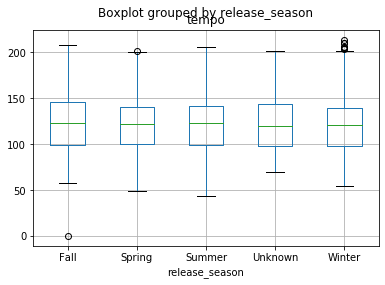

In [16]:
df.boxplot(column = 'tempo', by='release_season')

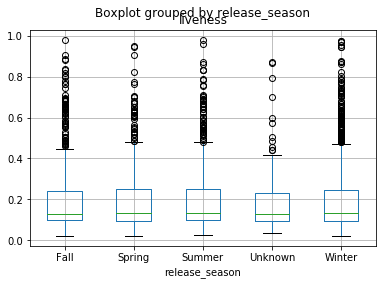

In [17]:
df.boxplot(column = 'liveness', by='release_season')

In [18]:
formula = """peak_rank ~ length + explicit + 
            popularity + danceability + energy + key_ + loudness + 
            mode + speechiness + acousticness + liveness + valence + tempo"""

In [19]:
df.columns

Index(['song_name', 'artist', 'min(peak_rank)', 'max(duration_on_chart)',
       'song_id', 'length', 'album_id', 'album', 'explicit', 'release_date',
       'popularity', 'danceability', 'energy', 'key_', 'loudness', 'mode',
       'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'release_season'],
      dtype='object')

In [20]:
column_names = list(df.columns)

In [21]:
column_names[2] = 'peak_rank'

In [22]:
column_names[3] = 'max_duration_on_chart'

In [23]:
df.columns = column_names

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
lm = ols(formula, df).fit()

In [26]:
table = sm.stats.anova_lm(lm, typ=2)

In [27]:
table

,sum_sq,df,F,PR(>F)
length,3.824908e+04,1.0,50.666087,1.230565e-12
explicit,3.945081e+04,1.0,52.257951,5.509626e-13
popularity,7.157042e+05,1.0,948.047279,1.163253e-192
danceability,2.289271e+04,1.0,30.324493,3.815298e-08
energy,1.663783e+04,1.0,22.039062,2.734380e-06
key_,2.109748e+03,1.0,2.794647,9.463470e-02
loudness,1.954323e+02,1.0,0.258877,6.109128e-01
mode,1.810736e+02,1.0,0.239857,6.243287e-01
speechiness,1.927403e+03,1.0,2.553106,1.101333e-01
acousticness,2.587380e+04,1.0,34.273355,5.057106e-09


remove tempo, liveness, loudness, mode, key

In [28]:
formula = """peak_rank ~ danceability + energy + speechiness + acousticness + liveness + valence + tempo"""

In [29]:
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
danceability,3.164892e+04,1.0,35.586782,2.586472e-09
energy,1.874667e+04,1.0,21.079185,4.501828e-06
speechiness,7.420619e+02,1.0,0.834392,3.610445e-01
acousticness,2.605452e+04,1.0,29.296309,6.465891e-08
liveness,3.706018e+01,1.0,0.041671,8.382549e-01
valence,8.911154e+03,1.0,10.019908,1.556751e-03
tempo,6.351621e+01,1.0,0.071419,7.892914e-01
Residual,5.055036e+06,5684.0,NaN,NaN


In [30]:
formula = """peak_rank ~ danceability + energy + acousticness + valence + valence:danceability"""

In [31]:
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
danceability,3.335569e+04,1.0,37.524830,9.630790e-10
energy,1.780583e+04,1.0,20.031386,7.766823e-06
acousticness,2.671173e+04,1.0,30.050433,4.390838e-08
valence,8.892190e+03,1.0,10.003627,1.570546e-03
valence:danceability,1.700607e+03,1.0,1.913166,1.666663e-01
Residual,5.054266e+06,5686.0,NaN,NaN


## Dancibility vs Peak Rank, Duration on Charts, and Popularity

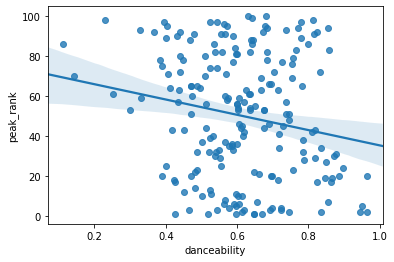

In [32]:
sns.regplot(x = 'danceability', y = 'peak_rank', data = df.sample(200), fit_reg=True)

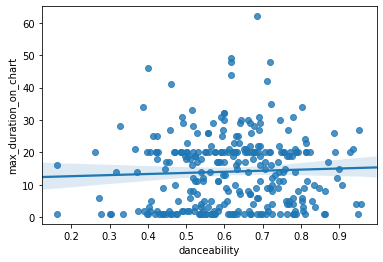

In [33]:
sns.regplot(x = 'danceability', y = 'max_duration_on_chart', data = df.sample(300), fit_reg=True)

## Energy vs Peak Rank, Duration on Charts, and Popularity

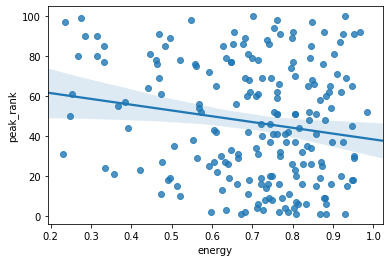

In [34]:
sns.regplot(x = 'energy', y = 'peak_rank', data = df.sample(200), fit_reg=True)

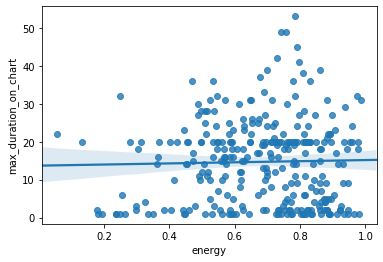

In [35]:
sns.regplot(x = 'energy', y = 'max_duration_on_chart', data = df.sample(300), fit_reg=True)

## Loudness vs Peak Rank, Duration on Charts, and Popularity

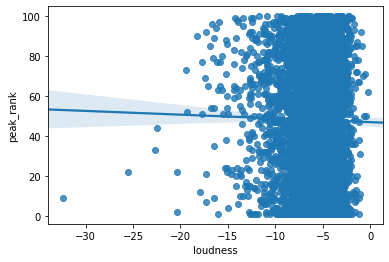

In [36]:
sns.regplot(x = 'loudness', y = 'peak_rank', data = df, fit_reg=True)

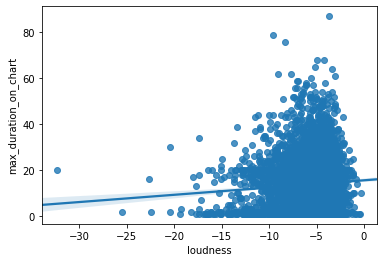

In [37]:
sns.regplot(x = 'loudness', y = 'max_duration_on_chart', data = df, fit_reg=True)

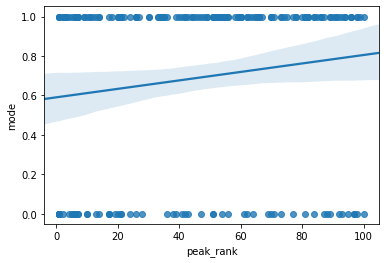

In [38]:
sns.regplot(x = 'peak_rank', y = 'mode', data = df.sample(200), fit_reg=True)

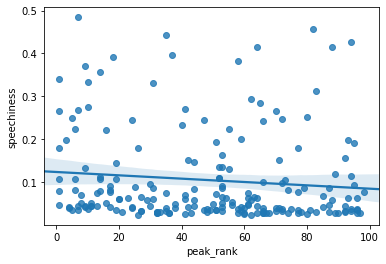

In [39]:
sns.regplot(x = 'peak_rank', y = 'speechiness', data = df.sample(200), fit_reg=True)

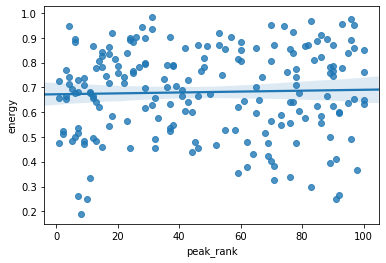

In [40]:
sns.regplot(x = 'peak_rank', y = 'energy', data = df.sample(200), fit_reg=True)

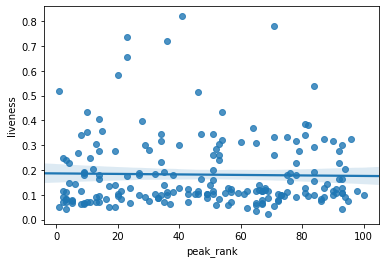

In [41]:
sns.regplot(x = 'peak_rank', y = 'liveness', data = df.sample(200), fit_reg=True)

## Valence vs Peak Rank, Duration on Charts, and Popularity

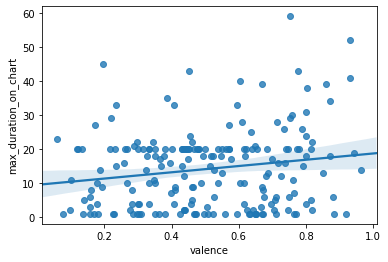

In [42]:
sns.regplot(x = 'valence', y = 'max_duration_on_chart', data = df.sample(200), fit_reg=True)

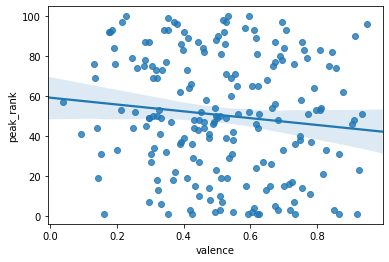

In [43]:
sns.regplot(x = 'valence', y = 'peak_rank', data = df.sample(200), fit_reg=True)

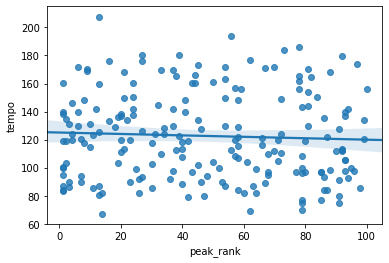

In [44]:
sns.regplot(x = 'peak_rank', y = 'tempo', data = df.sample(200), fit_reg=True)

In [45]:
formula = """max_duration_on_chart ~ danceability + valence"""
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
danceability,5439.838180,1.0,44.804674,2.385956e-11
valence,1886.377618,1.0,15.536958,8.187841e-05
Residual,690714.525172,5689.0,NaN,NaN


In [46]:
formula = """peak_rank ~ danceability + valence"""
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
danceability,5.777043e+04,1.0,64.632200,1.089168e-15
valence,2.461684e+03,1.0,2.754074,9.706209e-02
Residual,5.085019e+06,5689.0,NaN,NaN


In [47]:
formula = """peak_rank ~ danceability"""
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
danceability,7.874162e+04,1.0,88.067127,8.933083e-21
Residual,5.087481e+06,5690.0,NaN,NaN


In [48]:
formula = """popularity ~ danceability"""
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
danceability,1.445642e+04,1.0,63.850795,1.612137e-15
Residual,1.288270e+06,5690.0,NaN,NaN


In [49]:
formula = """peak_rank ~ valence"""
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
valence,2.343287e+04,1.0,25.926213,3.661381e-07
Residual,5.142789e+06,5690.0,NaN,NaN


In [50]:
df.corr()

,peak_rank,max_duration_on_chart,length,explicit,popularity,danceability,energy,key_,loudness,mode,speechiness,acousticness,liveness,valence,tempo
peak_rank,1.000000,-0.740581,-0.063236,-0.001184,-0.375019,-0.123457,0.010095,-0.016265,-0.014988,0.025792,-0.014769,0.065272,0.014174,-0.067348,0.024938
max_duration_on_chart,-0.740581,1.000000,0.041232,-0.026191,0.432759,0.116680,0.038756,-0.002364,0.068306,0.003041,-0.030537,-0.093870,-0.052636,0.092485,-0.027514
length,-0.063236,0.041232,1.000000,0.107362,0.000879,-0.100829,-0.069891,-0.013885,-0.075407,-0.039338,0.066723,0.023556,0.013054,-0.179783,-0.022771
explicit,-0.001184,-0.026191,0.107362,1.000000,0.140278,0.308327,-0.062932,0.010844,-0.046996,-0.143857,0.498615,-0.083249,0.075668,-0.064437,-0.012606
popularity,-0.375019,0.432759,0.000879,0.140278,1.000000,0.105343,0.032982,-0.001407,0.105029,-0.062597,0.032593,-0.052667,-0.023087,0.003009,0.001392
danceability,-0.123457,0.116680,-0.100829,0.308327,0.105343,1.000000,0.015845,-0.012593,0.017942,-0.115396,0.216465,-0.161459,-0.067361,0.382125,-0.195924
energy,0.010095,0.038756,-0.069891,-0.062932,0.032982,0.015845,1.000000,0.021404,0.729770,-0.037573,0.016775,-0.576088,0.162278,0.427020,0.130327
key_,-0.016265,-0.002364,-0.013885,0.010844,-0.001407,-0.012593,0.021404,1.000000,0.013403,-0.127598,0.019505,-0.010059,0.006770,0.020792,-0.018094
loudness,-0.014988,0.068306,-0.075407,-0.046996,0.105029,0.017942,0.729770,0.013403,1.000000,-0.030321,-0.048569,-0.427903,0.093940,0.287120,0.080875
mode,0.025792,0.003041,-0.039338,-0.143857,-0.062597,-0.115396,-0.037573,-0.127598,-0.030321,1.000000,-0.142196,0.054562,-0.013152,-0.053835,0.035717


In [51]:
df['num_one_song'] = df.peak_rank.map(lambda x: True if x == 1 else False)

In [52]:
df.head()

,song_name,artist,peak_rank,max_duration_on_chart,song_id,length,album_id,album,explicit,release_date,...,key_,loudness,mode,speechiness,acousticness,liveness,valence,tempo,release_season,num_one_song
0,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,71,19,6AoYWCzsDls6c61Zp5qTuU,290835,5eLVoIPq7P3Bu29lVgD4x0,Professional Rapper,1,2015-07-31,...,2.0,-5.361,1.0,0.2300,0.11400,0.2240,0.364,98.012,Summer,False
1,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,4,23,3B9Py8YkCax0UnGCTQX9s2,204720,4s3VNRW2fqwS1U5qMWJ7xI,Ultimate Seduction - Sexy Music Mix,0,2013-02-01,...,1.0,-9.799,0.0,0.0764,0.17000,0.0975,0.904,89.809,Winter,False
2,'Til Summer Comes Around,Keith Urban,58,16,1CKmI1IQjVEVB3F7VmJmM3,331466,59iMA7L7Vab6md5dlm83fy,Defying Gravity,0,2009-01-01,...,9.0,-7.608,0.0,0.0331,0.59300,0.7700,0.308,127.907,Winter,False
3,(I Hate) Everything About You,Three Days Grace,55,20,6rUp7v3l8yC4TKxAAR5Bmx,231480,38pfSOHvxHqDWwDnjZ25U5,Three Days Grace (Deluxe Version),0,2007-12-25,...,6.0,-5.157,0.0,0.0421,0.00461,0.1390,0.453,89.342,Winter,False
4,(I Never Promised You A) Rose Garden,Martina McBride,98,2,6goA1BGYQSSricr7oV8r8m,195573,0HiQVsQdNpLarQJN3RgOhU,The Essential Martina McBride,0,2012-10-23,...,2.0,-6.944,1.0,0.0478,0.50300,0.1330,0.780,131.908,Fall,False


In [53]:
sns.boxplot(x = 'num_one_song', y = 'danceability', hue = 'before_fc', data = df_updated)

NameError: name 'df_updated' is not defined

In [ ]:
sns.boxplot(x = 'num_one_song', y = 'energy', data = df)

In [54]:
sns.boxplot(x = 'num_one_song', y = 'valence', hue = 'before_fc', data = df_updated)

NameError: name 'df_updated' is not defined

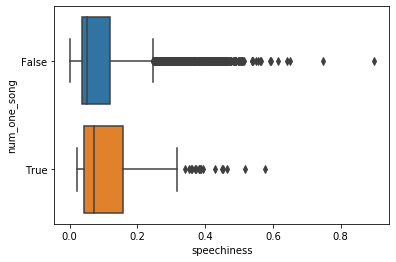

In [55]:
sns.boxplot(x = 'speechiness', y = 'num_one_song', data = df, orient='h')

In [56]:
df['release_year'] = df['release_date'].map(lambda x: x.year)

In [57]:
df.release_year.value_counts()

2011.0    438
2010.0    435
2017.0    417
2012.0    379
2016.0    369
2009.0    361
2014.0    350
2013.0    345
2008.0    338
2007.0    313
2015.0    300
2005.0    288
2006.0    277
2004.0    222
2003.0    217
2002.0    132
2018.0     88
2019.0     54
2001.0     17
1984.0      7
1982.0      5
2000.0      4
1996.0      4
1987.0      4
1992.0      3
1985.0      3
1964.0      2
1986.0      2
1965.0      2
1998.0      2
1983.0      1
1990.0      1
1967.0      1
1959.0      1
1994.0      1
1980.0      1
1989.0      1
1968.0      1
1970.0      1
1976.0      1
1969.0      1
Name: release_year, dtype: int64

In [58]:
df[df.release_year < 2000]

,song_name,artist,peak_rank,max_duration_on_chart,song_id,length,album_id,album,explicit,release_date,...,loudness,mode,speechiness,acousticness,liveness,valence,tempo,release_season,num_one_song,release_year
34,1999,Prince,12,30,2H7PHVdQ3mXqEHXcvclTB0,379266,3U1ht9EdWEI9nMvaqdQI67,1999,0,1982-10-27,...,-8.201,1.0,0.0767,0.137000,0.0843,0.625,118.523,Fall,False,1982.0
95,A Holly Jolly Christmas,Burl Ives,41,3,65Q2mv3UlVi9eO70OpsmSe,135533,5r5iTtNflB2DAKO1t5ih8f,Have A Holly Jolly Christmas,0,1965-01-01,...,-12.937,1.0,0.0309,0.616000,0.0781,0.862,140.352,Winter,False,1965.0
194,All I Want For Christmas Is You,Mariah Carey,9,22,0bYg9bo50gSsH3LtXe2SQn,241106,61ulfFSmmxMhc2wCdmdMkN,Merry Christmas,0,1994-11-01,...,-7.462,1.0,0.0386,0.164000,0.0708,0.346,150.277,Fall,False,1994.0
213,All Summer Long,The Rock Heroes,29,15,3v9xlH6BpmRbqL7hgNJhfT,134386,6GnzWMUyNEETCq6eftD98v,All Summer Long,0,1964-07-13,...,-7.813,0.0,0.0537,0.360000,0.0663,0.514,144.338,Summer,False,1964.0
365,Baby,LL Cool J Featuring The-Dream,52,11,1blZP5x1XQSqQFpTy12rFh,239733,66Vhr3F0vp90jhQUlcf4Sk,The Day,0,1996-10-29,...,-7.346,1.0,0.0518,0.029500,0.0660,0.761,94.013,Fall,False,1996.0
561,Billie Jean,Michael Jackson,1,25,5ChkMS8OtdzJeqyybCc9R5,293826,1C2h7mLntPSeVYciMRTF4a,Thriller 25 Super Deluxe Edition,0,1982-11-30,...,-3.051,0.0,0.0401,0.023600,0.0359,0.847,117.046,Fall,True,1982.0
1424,Faith,George Michael,1,21,0HEmnAUT8PHznIAAmVXqFJ,193200,34K1Kvskt9arWy8E1Gz3Lw,Faith,0,1987-10-30,...,-11.994,1.0,0.1170,0.009400,0.0662,0.607,95.846,Fall,True,1987.0
1757,God Bless The U.S.A.,American Idol Finalists,4,8,623lYBOJ7bLwh1bu3yeN5V,191600,5YeR8Om8eLONq8C8pluHn7,American Patriot,0,1992-01-01,...,-9.977,1.0,0.0285,0.087300,0.1820,0.168,67.797,Winter,False,1992.0
1837,Greatest Love Of All,Whitney Houston,1,20,6yJxCltgtmGxIgKOS6ndnu,291400,2MH37enG6IPvNK5QFLyKes,Whitney Houston,0,1985-02-14,...,-16.011,1.0,0.0339,0.484000,0.1170,0.248,131.242,Winter,True,1985.0
1871,Hallelujah,Leonard Cohen,59,1,7yzbimr8WVyAtBX3Eg6UL9,277160,6I58qJMqZHhb8jtNT3CuJB,Various Positions,0,1984-12-11,...,-12.577,1.0,0.0293,0.715000,0.1330,0.232,171.143,Winter,False,1984.0


In [59]:
df_updated = df.length.map(lambda x: x/1000)

In [60]:
df_updated = df[df['release_year'] > 2002]

In [123]:
sns.distplot()

AttributeError: module 'seaborn' has no attribute 'disthist'

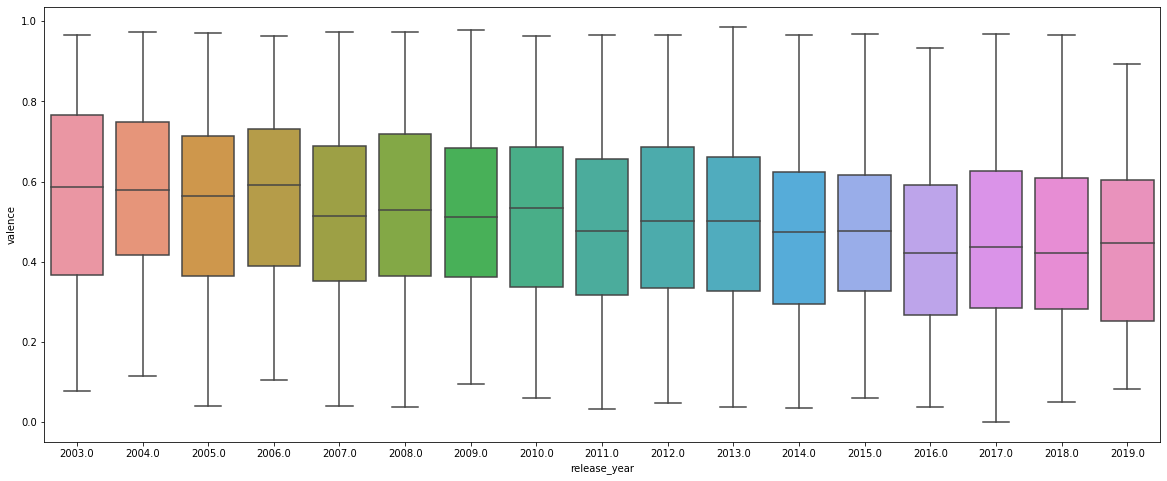

In [61]:
fig = plt.figure(figsize=(20, 8))
sns.boxplot(y = 'valence', x = 'release_year', data = df_updated)

In [62]:
df_updated['before_fc'] = df_updated.release_year.map(lambda x: True if x < 2008 else False)

/Users/kathringo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_updated.before_fc.value_counts()

False    3874
True     1317
Name: before_fc, dtype: int64

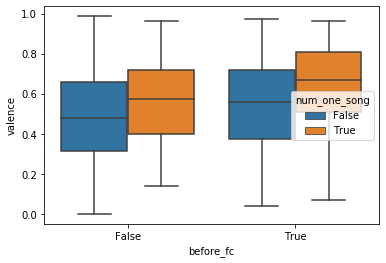

In [64]:
sns.boxplot(y = 'valence', x = 'before_fc', hue = 'num_one_song', data = df_updated)

In [65]:
import scipy.stats

In [66]:
df_updated['valence_cat'] = pd.cut(x=df_updated.valence, bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                   labels=['highly negative', 'negative', 'neutral', 'positive', 'highly positive'])

/Users/kathringo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
df_updated

,song_name,artist,peak_rank,max_duration_on_chart,song_id,length,album_id,album,explicit,release_date,...,speechiness,acousticness,liveness,valence,tempo,release_season,num_one_song,release_year,before_fc,valence_cat
0,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,71,19,6AoYWCzsDls6c61Zp5qTuU,290835,5eLVoIPq7P3Bu29lVgD4x0,Professional Rapper,1,2015-07-31,...,0.2300,0.114000,0.2240,0.364,98.012,Summer,False,2015.0,False,negative
1,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,4,23,3B9Py8YkCax0UnGCTQX9s2,204720,4s3VNRW2fqwS1U5qMWJ7xI,Ultimate Seduction - Sexy Music Mix,0,2013-02-01,...,0.0764,0.170000,0.0975,0.904,89.809,Winter,False,2013.0,False,highly positive
2,'Til Summer Comes Around,Keith Urban,58,16,1CKmI1IQjVEVB3F7VmJmM3,331466,59iMA7L7Vab6md5dlm83fy,Defying Gravity,0,2009-01-01,...,0.0331,0.593000,0.7700,0.308,127.907,Winter,False,2009.0,False,negative
3,(I Hate) Everything About You,Three Days Grace,55,20,6rUp7v3l8yC4TKxAAR5Bmx,231480,38pfSOHvxHqDWwDnjZ25U5,Three Days Grace (Deluxe Version),0,2007-12-25,...,0.0421,0.004610,0.1390,0.453,89.342,Winter,False,2007.0,True,neutral
4,(I Never Promised You A) Rose Garden,Martina McBride,98,2,6goA1BGYQSSricr7oV8r8m,195573,0HiQVsQdNpLarQJN3RgOhU,The Essential Martina McBride,0,2012-10-23,...,0.0478,0.503000,0.1330,0.780,131.908,Fall,False,2012.0,False,positive
5,(I've Had) The Time Of My Life,Glee Cast,38,1,1wYDz3NuqlGxPnQDX8OuV6,277560,6al4VUZHO90Zmw0fm4vVeI,"Glee: The Music, Volume 4",0,2010-11-26,...,0.0472,0.076500,0.0879,0.168,110.705,Fall,False,2010.0,False,highly negative
6,(If You're Wondering If I Want You To) I Want ...,Weezer,81,9,09aDV0TC2RfWFU5IwZfIdG,208773,6J2BJd3FQDDlh2ZjL6QIpF,Raditude (Deluxe),0,2009-11-03,...,0.0442,0.002190,0.1270,0.800,110.015,Fall,False,2009.0,False,positive
7,(It) Feels So Good,Steven Tyler,35,4,3xuzbqmCALn6Ua8JeOrnZl,211293,2Qdbwfs2JcGlgvRTxPUIAq,(It) Feels So Good,0,2011-05-10,...,0.0515,0.063100,0.2160,0.899,122.000,Spring,False,2011.0,False,highly positive
8,(Kissed You) Good Night,Gloriana,34,20,0Rj68IX1WqAtceUZQGk7aa,232903,4QbCKNp0gHsKCImIdJOWos,A Thousand Miles Left Behind,0,2012-07-27,...,0.0292,0.080700,0.1100,0.294,118.970,Summer,False,2012.0,False,negative
9,(Reach Up For The) Sunrise,Duran Duran,89,5,1UiRhN1y1ML67E7oTjKtlZ,334586,2Vc0Xye5VsrBhK2PIqMYdq,"A Diamond In The Mind (Live At The MEN Arena,M...",0,2012-01-01,...,0.1290,0.001370,0.9720,0.380,129.965,Winter,False,2012.0,False,negative


In [68]:
valence_num_one_song_crosstab = pd.crosstab(df_updated.valence_cat, df_updated.num_one_song)

In [69]:
valence_num_one_song_crosstab

num_one_song,False,True
valence_cat,,
highly negative,487,9
negative,1304,30
neutral,1457,47
positive,1228,56
highly positive,541,31


In [70]:
chi_sqr, p, dof, expected_freq = scipy.stats.chi2_contingency(valence_num_one_song_crosstab)

In [71]:
print("Chi Square Test Statistic ", chi_sqr)
print('p-value: ', p)
print("Degrees of Freedom: ", dof)
print("Expected Freq: ", '\n', expected_freq)

Chi Square Test Statistic  20.56003401500503
p-value:  0.0003870393255547981
Degrees of Freedom:  4
Expected Freq:  
 [[ 479.46666667   16.53333333]
 [1289.53333333   44.46666667]
 [1453.86666667   50.13333333]
 [1241.2          42.8       ]
 [ 552.93333333   19.06666667]]


In [72]:
df_updated.tempo.describe()

count    5191.000000
mean      122.939342
std        29.460245
min         0.000000
25%        99.165000
50%       122.557000
75%       142.031500
max       213.885000
Name: tempo, dtype: float64

In [84]:
df_updated.tempo_cat.value_counts()

3_Allegro     1900
2_Moderato    1816
4_Vivace      1045
5_Presto       384
1_Adagio        45
Name: tempo_cat, dtype: int64

In [83]:
df_updated['tempo_cat'] = pd.cut(x=df_updated.tempo, bins=[0, 70, 110, 140, 170, 250],
                                   labels=['1_Adagio', '2_Moderato', '3_Allegro', '4_Vivace', '5_Presto'])

/Users/kathringo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


num_one_song,False,True
tempo_cat,,
1_Adagio,44,1
2_Moderato,1761,55
3_Allegro,1825,75
4_Vivace,1015,30
5_Presto,372,12


In [106]:
tempo_num_one_song_crosstab = pd.crosstab(df_updated.tempo_cat, df_updated.num_one_song)
chi_sqr, p, dof, expected_freq = scipy.stats.chi2_contingency(tempo_num_one_song_crosstab)
print("Chi Square Test Statistic ", chi_sqr)
print('p-value: ', p)
print("Degrees of Freedom: ", dof)
print("Expected Freq: ", '\n', expected_freq)
tempo_num_one_song_crosstab

Chi Square Test Statistic  3.6643900084820484
p-value:  0.4533263591119451
Degrees of Freedom:  4
Expected Freq:  
 [[4.35000000e+01 1.50000000e+00]
 [1.75546667e+03 6.05333333e+01]
 [1.83666667e+03 6.33333333e+01]
 [1.01016667e+03 3.48333333e+01]
 [3.71200000e+02 1.28000000e+01]]


num_one_song,False,True
tempo_cat,,
1_Adagio,44,1
2_Moderato,1761,55
3_Allegro,1825,75
4_Vivace,1015,30
5_Presto,372,12


In [101]:
print("Chi Square Test Statistic ", chi_sqr)
print('p-value: ', p)
print("Degrees of Freedom: ", dof)
print("Expected Freq: ", '\n', expected_freq)

Chi Square Test Statistic  3.6643900084820484
p-value:  0.4533263591119451
Degrees of Freedom:  4
Expected Freq:  
 [[4.35000000e+01 1.50000000e+00]
 [1.75546667e+03 6.05333333e+01]
 [1.83666667e+03 6.33333333e+01]
 [1.01016667e+03 3.48333333e+01]
 [3.71200000e+02 1.28000000e+01]]


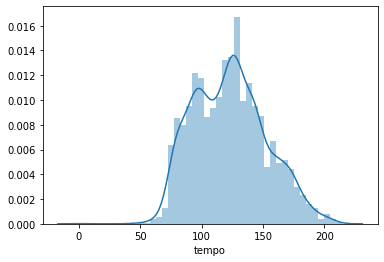

In [76]:
sns.distplot(df_updated.tempo)

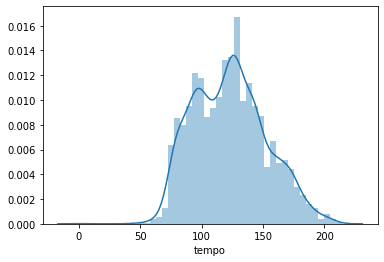

In [98]:
sns.distplot(df_updated.tempo)

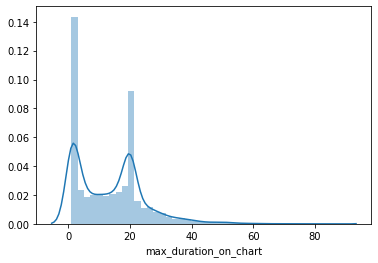

In [146]:
sns.distplot(df_updated.max_duration_on_chart)

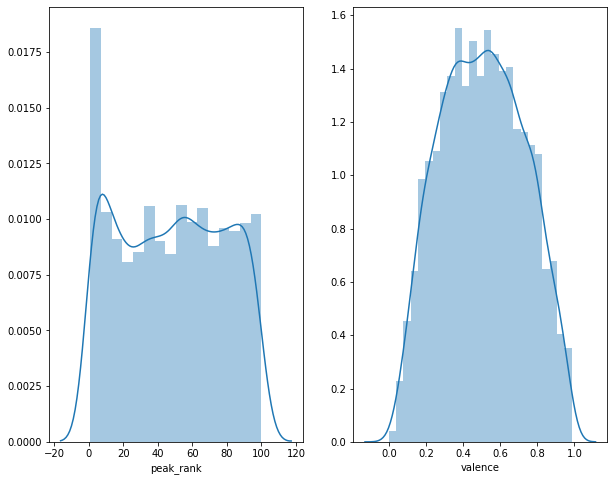

In [95]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)
sns.distplot(df_updated.peak_rank, ax=ax1, norm_hist=True)
sns.distplot(df_updated.valence, ax=ax2, norm_hist=True)

In [135]:
df_updated.corr()

,peak_rank,max_duration_on_chart,length,explicit,popularity,danceability,energy,key_,loudness,mode,speechiness,acousticness,liveness,valence,tempo,num_one_song,release_year,before_fc
peak_rank,1.000000,-0.739005,-0.057679,0.000304,-0.367011,-0.119110,0.003560,-0.018746,-0.024006,0.025676,-0.014760,0.066859,0.015100,-0.070369,0.017917,-0.292577,0.090773,-0.072935
max_duration_on_chart,-0.739005,1.000000,0.032087,-0.024484,0.434037,0.121891,0.044315,-0.001595,0.075039,0.003337,-0.026299,-0.093178,-0.051302,0.100476,-0.024777,0.319557,-0.112098,0.113992
length,-0.057679,0.032087,1.000000,0.110778,-0.010985,-0.107994,-0.062505,-0.016520,-0.068441,-0.033842,0.068125,0.029608,0.011761,-0.175962,-0.021382,0.026969,-0.155124,0.097048
explicit,0.000304,-0.024484,0.110778,1.000000,0.140891,0.317655,-0.072264,0.015248,-0.057774,-0.146018,0.500349,-0.080945,0.074917,-0.065359,-0.018653,0.010501,0.149855,-0.048074
popularity,-0.367011,0.434037,-0.010985,0.140891,1.000000,0.117063,0.033285,-0.000851,0.116790,-0.065766,0.039177,-0.045162,-0.028416,0.006731,-0.002478,0.177204,0.238187,-0.115999
danceability,-0.119110,0.121891,-0.107994,0.317655,0.117063,1.000000,0.018803,-0.014393,0.015310,-0.114041,0.209828,-0.169760,-0.063461,0.371076,-0.188776,0.091650,0.064090,0.028776
energy,0.003560,0.044315,-0.062505,-0.072264,0.033285,0.018803,1.000000,0.024927,0.732938,-0.037032,0.006428,-0.578296,0.167014,0.438209,0.127767,-0.010245,-0.184130,0.082627
key_,-0.018746,-0.001595,-0.016520,0.015248,-0.000851,-0.014393,0.024927,1.000000,0.014736,-0.128560,0.026328,-0.011044,0.009240,0.024212,-0.012939,-0.011654,0.002360,-0.010677
loudness,-0.024006,0.075039,-0.068441,-0.057774,0.116790,0.015310,0.732938,0.014736,1.000000,-0.022417,-0.066178,-0.424966,0.097931,0.302435,0.082593,0.014075,-0.163376,0.067409
mode,0.025676,0.003337,-0.033842,-0.146018,-0.065766,-0.114041,-0.037032,-0.128560,-0.022417,1.000000,-0.141173,0.053478,-0.019111,-0.058538,0.039165,-0.024732,-0.034487,-0.005082


In [139]:
import scipy.stats as stats

In [141]:
stats.ttest_ind(df_updated[df_updated['num_one_song']==False].valence, df_updated[df_updated['num_one_song']==True].valence)

Ttest_indResult(statistic=-4.588824824141636, pvalue=4.562541562820915e-06)

Text(0.5, 1.0, 'Distibutions of Number One Songs by Song Valence')

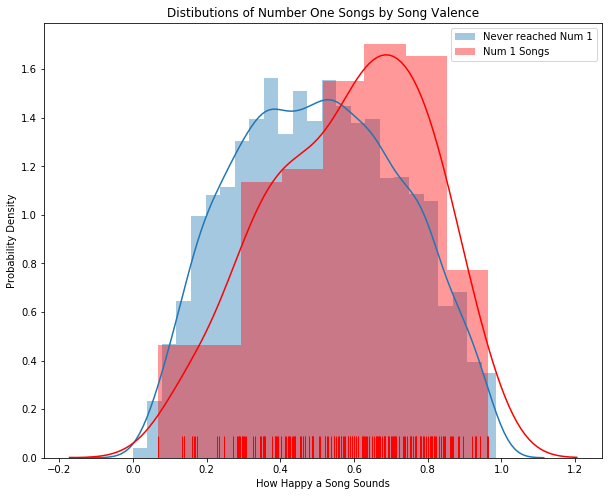

In [149]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
sns.distplot(df_updated[df_updated['num_one_song']==False].valence, ax=ax1, norm_hist=True, label="Never reached Num 1")
sns.distplot(df_updated[df_updated['num_one_song']==True].valence, ax=ax1, norm_hist=True, rug=True, label="Num 1 Songs", color = 'red')
plt.xlabel('How Happy a Song Sounds')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Distibutions of Number One Songs by Song Valence')

In [136]:
df_updated['num_one_song'].value_counts()

False    5018
True      173
Name: num_one_song, dtype: int64

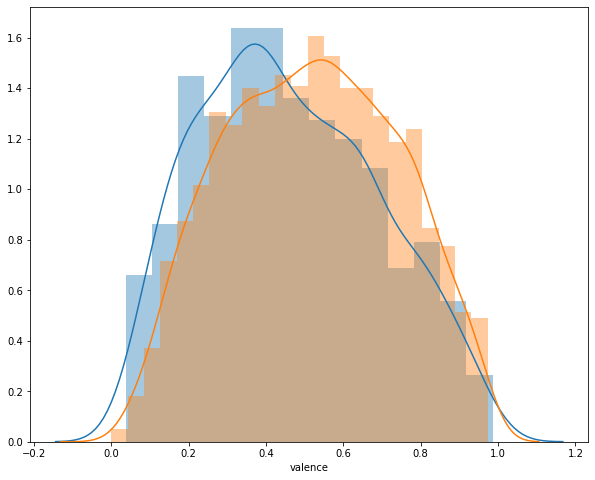

In [130]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
sns.distplot(df_updated[df_updated['max_duration_on_chart']==1].valence, ax=ax1, norm_hist=True)
sns.distplot(df_updated[df_updated['max_duration_on_chart']>1].valence, ax=ax1, norm_hist=True)

In [118]:
pd.set_option('display.max_columns', None)

In [121]:
df[df['num_one_song']==True].sort_values(by='release_year', ascending=False)#, key=lambda x: x[])

,song_name,artist,peak_rank,max_duration_on_chart,song_id,length,album_id,album,explicit,release_date,popularity,danceability,energy,key_,loudness,mode,speechiness,acousticness,liveness,valence,tempo,release_season,num_one_song,release_year
4051,S&M,Rihanna Featuring Britney Spears,1,26,4sjiIpEv617LDXaidKioOI,176640,7cekEHNPgpKwVd9kJE9G8F,223's (feat. 9lokknine),1,2019-08-09,88,0.931,0.502,0.0,-9.311,0.0,0.3530,0.038900,0.0912,0.712,94.999,Summer,True,2019.0
858,Check On It,Beyonce Featuring Slim Thug,1,28,632ikkYPSHSHA5udZeuKvk,76214,35S1JCj5paIfElT2GODl6x,HOMECOMING: THE LIVE ALBUM,0,2019-04-17,62,0.519,0.884,7.0,-8.077,1.0,0.3690,0.002940,0.9430,0.693,167.345,Spring,True,2019.0
3990,Rockstar,Post Malone Featuring 21 Savage,1,16,0e7ipj03S05BNilyu5bRzt,218146,6trNtQUgC8cgbWcqoMYkOR,beerbongs & bentleys,1,2018-04-27,88,0.587,0.535,5.0,-6.090,0.0,0.0898,0.117000,0.1310,0.140,159.847,Spring,True,2018.0
648,Born This Way,Lady Gaga,1,20,2rbDhOo9Fh61Bbu23T2qCk,210200,3edjzMAVB9RYRd4UcZBchx,A Star Is Born Soundtrack (Without Dialogue),0,2018-10-05,81,0.553,0.502,0.0,-5.972,1.0,0.0409,0.299000,0.7640,0.296,129.976,Fall,True,2018.0
619,Bodak Yellow (Money Moves),Cardi B,1,27,3g2qgbWPl8TcgJIkstWpSV,220395,4vqBWMIOx7gLfYKFSbl7XS,Bodak Yellow (Money Moves) [Originally perform...,0,2017-09-13,19,0.813,0.574,9.0,-9.401,1.0,0.0577,0.060600,0.4280,0.546,124.982,Fall,True,2017.0
2154,Humble.,Kendrick Lamar,1,37,7KXjTSCq5nL1LoYtL7XAwS,177000,4eLPsYPBmXABThSJ821sqY,DAMN.,1,2017-04-14,84,0.908,0.621,1.0,-6.638,0.0,0.1020,0.000282,0.0958,0.421,150.011,Spring,True,2017.0
3699,Perfect,Ed Sheeran,1,19,0tgVpDi06FyKpA1z0VMD4v,263400,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),0,2017-03-03,87,0.599,0.448,8.0,-6.312,1.0,0.0232,0.163000,0.1060,0.168,95.050,Spring,True,2017.0
4179,Shape Of You,Ed Sheeran,1,52,7qiZfU4dY1lWllzX7mPBI3,233712,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),0,2017-03-03,86,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.0931,0.931,95.977,Spring,True,2017.0
2420,I'm The One,"DJ Khaled Featuring Justin Bieber, Quavo, Chan...",1,22,1jYiIOC5d6soxkJP81fxq2,288876,3HhZbSJdhOqMSaRbEt3gtw,Grateful,1,2017-06-22,70,0.599,0.667,7.0,-4.267,1.0,0.0367,0.053300,0.1340,0.817,80.984,Summer,True,2017.0
397,Bad And Boujee,Migos Featuring Lil Uzi Vert,1,36,4Km5HrUvYTaSUfiSGPJeQR,343150,2AvupjUeMnSffKEV05x222,Culture,1,2017-01-27,76,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061000,0.1230,0.175,127.076,Winter,True,2017.0


In [ ]:
season_num_one_song_crosstab = pd.crosstab(df_updated.release_season, df_updated.num_one_song)
chi_sqr, p, dof, expected_freq = scipy.stats.chi2_contingency(season_num_one_song_crosstab)
print("Chi Square Test Statistic ", chi_sqr)
print('p-value: ', p)
print("Degrees of Freedom: ", dof)
print("Expected Freq: ", '\n', expected_freq)
season_num_one_song_crosstab

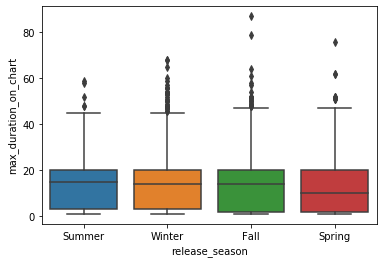

In [104]:
sns.boxplot(x='release_season', y='max_duration_on_chart', data=df_updated)

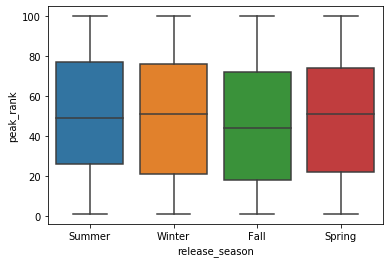

In [105]:
sns.boxplot(x='release_season', y='peak_rank', data=df_updated)

In [109]:
season_num_one_song_crosstab = pd.crosstab(df_updated.release_season, df_updated.num_one_song)
chi_sqr, p, dof, expected_freq = scipy.stats.chi2_contingency(season_num_one_song_crosstab)
print("Chi Square Test Statistic ", chi_sqr)
print('p-value: ', p)
print("Degrees of Freedom: ", dof)
print("Expected Freq: ", '\n', expected_freq)
season_num_one_song_crosstab

Chi Square Test Statistic  2.09380263544257
p-value:  0.5531675495550705
Degrees of Freedom:  3
Expected Freq:  
 [[1216.07474475   41.92525525]
 [ 932.83952996   32.16047004]
 [ 847.77229821   29.22770179]
 [2021.31342709   69.68657291]]


num_one_song,False,True
release_season,,
Fall,1210,48
Spring,931,34
Summer,853,24
Winter,2024,67
